In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt
import corner

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [5]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [6]:
T_data = [c.baryon_temp for c in clusters]

In [7]:
ndim, nwalkers = 2, 5
log_sigma0 = np.random.uniform(low=-40, high=-10, size=(nwalkers, 1)).astype(dtype=np.float128)
log_mchi = np.random.uniform(low=-10, high=0, size=(nwalkers, 1)).astype(dtype=np.float128)

p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((nwalkers,))
p0[:,1]= log_mchi.reshape((nwalkers,))
p0

array([[-16.9691614 ,  -8.30290918],
       [-35.54961984,  -9.55363066],
       [-25.7295062 ,  -2.3069973 ],
       [-30.13710544,  -7.01974987],
       [-21.96161608,  -3.26630232]])

In [8]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters])

In [9]:
state = sampler.run_mcmc(p0, 100, progress=True)
sampler.reset()

[-16.9691614   -8.30290918]
[-35.54961984  -9.55363066]
[-25.7295062  -2.3069973]


You must install the tqdm library to use progress indicators with emcee


[-30.13710544  -7.01974987]
[-21.96161608  -3.26630232]
[-11.9979844   -8.78732892]
[-35.70290936  -9.6253935 ]
[-25.60712434  -2.33815573]
[-25.37211564  -4.78900917]
[-21.66025348  -3.34302925]
[-23.16824322  -4.02227092]
[-23.1251805   -5.72861984]
[-15.48668894  -9.87032361]
[-35.08151018  -9.34762178]
[-22.51117355  -4.72872758]
[-22.87176148  -4.34103696]
[-21.88770162  -3.71342186]
[-24.14556606  -3.48604918]
[-28.37120618  -6.90392442]
[-19.7030183   -6.53977681]
[-19.87711445  -3.107727  ]
[-21.6604774   -5.27736271]
[-21.58768798  -3.3105651 ]
[-19.2529524   -6.83003551]
[-34.91279375  -9.27191378]
[-19.76935657  -6.42611216]
[-32.18446592  -8.15337952]
[-23.19766819  -7.14750588]
[-19.99616598  -3.25256484]
[-21.55586968  -2.45082282]
[-19.84657182  -4.04828207]
[-19.71500229  -4.74569935]
[-24.04063645  -3.78397379]
[-19.73138154  -7.59554647]
[-27.79616414  -6.6932919 ]
[-17.69137047  -6.35694447]
[-19.9041135   -3.74326795]
[-21.8593045   -2.07255253]
[-24.78071001  -5.68

[-19.7580692  -6.8477963]
[-19.75915977  -5.92953006]
[-19.75969067  -1.34190572]
[-19.75751501  -8.92279723]
[-19.75693779  -5.96092003]
[-19.7581279   -6.32932906]
[-19.75852045  -2.58197026]
[-19.75725086  -5.95649726]
[-19.75947901  -7.60117038]
[-19.75823055  -5.89499592]
[-19.75812136  -6.59904143]
[-19.75714681  -4.41394241]
[-19.75912959  -7.83630936]
[-19.75857436  -2.03938905]
[-19.75907163  -7.73627814]
[-19.75833956  -7.08827143]
[-19.75860808  -1.31431344]
[-19.7579311  -5.7676647]
[-19.75841673  -0.23357708]
[-19.7574259   -9.12104353]
[-19.75603951  -2.50270276]
[-19.75730378  -5.02325084]
[-19.75846974  -2.05851107]
[-19.75736725  -8.84103332]
[-19.75728881  -4.12323117]
[-19.75568911  -2.56674915]
[-19.75991824  -9.03015473]
[-19.75792633  -3.008605  ]
[-19.75783534  -3.16768385]
[-19.75530466  -1.97919749]
[-19.75932898  -7.37163933]
[-19.75737258  -8.77637315]
[-19.75445305  -1.5792525 ]
[-19.7606903   -2.11415595]
[-19.75789162  -5.598298  ]
[-19.75757256  -3.627140

In [10]:
n_steps=10000
sampler.run_mcmc(state, n_steps, progress=True)

You must install the tqdm library to use progress indicators with emcee


[-19.75560884  -5.24252754]
[-19.75675562  -2.08007147]
[-19.75401795  -1.75349077]
[-19.75241651  -1.45217202]
[-19.74668424  -9.92252718]
[-19.75586106  -2.47842148]
[-19.75095611  -7.68238827]
[-19.75772589  -2.7272769 ]
[-19.76439097  -0.63723636]
[-19.75323375  -2.04183561]
[-19.75981215  -3.74933704]
[-19.75646346  -2.57852321]
[-19.74959827  -8.99405652]
[-19.75807175  -0.80869691]
[-19.75007548  -1.2220717 ]
[-19.75557107  -2.60755483]
[-19.75273496  -2.03642043]
[-19.7496857   -8.80012495]
[-19.75775126  -2.09088082]
[-19.76462076  -1.35093574]
[-19.75216154  -2.03019499]
[-19.75030773  -7.09924533]
[-19.7572601   -1.69562812]
[-19.7606331   -3.97035331]
[-19.75227772  -1.71250989]
[-19.75419817  -2.23794119]
[-19.7430183  -9.3081581]
[-19.76214711  -4.95775985]
[-19.75401715  -4.60336997]
[-19.75259655  -1.79974194]
[-19.75417084  -2.59507637]
[-19.75528551  -1.951615  ]
[-19.7595937   -4.08408101]
[-19.75320816  -6.29471587]
[-19.75382145  -1.8689246 ]
[-19.75416124  -2.2017

[-19.74980374  -4.02131113]
[-19.74490165  -1.92657414]
[-19.74378671  -2.3691199 ]
[-19.73677049  -2.73855824]
[-19.74115009  -0.66965791]
[-19.76528309  -8.7551425 ]
[-19.71836859  -1.2876387 ]
[-19.75679857  -2.36479115]
[-19.75290929  -5.47825207]
[-19.73976842  -1.81945842]
[-19.72764175  -1.56641012]
[-19.7232975   -1.42708072]
[-19.76080188  -2.47684565]
[-19.75305631  -5.50101339]
[-19.74274053  -1.89026159]
[-19.73930337  -3.37182561]
[-19.72526466  -1.4901718 ]
[-19.74664305  -1.96291204]
[-19.73339317  -1.72043398]
[-19.75227144  -5.283558  ]
[-19.73705658  -1.81854047]
[-19.76839973  -7.43025796]
[-19.75067363  -2.04701854]
[-19.72031396  -0.46049006]
[-19.72041834  -1.41567854]
[-19.76464069  -8.10051627]
[-19.72576691  -1.48590823]
[-19.73821238  -1.85259434]
[-19.73790961  -1.35004946]
[-19.74490993  -2.0499273 ]
[-19.72172184  -1.43279414]
[-19.74975736  -5.56802747]
[-19.72535632  -1.48051685]
[-19.73909077  -1.83388883]
[-19.73371332  -0.40469725]
[-19.72256758  -1.44

[-19.64813524  -1.04071559]
[-19.71909033  -4.62525018]
[-19.62459243  -0.99871828]
[-19.57906381  -0.3932984 ]
[-19.62006441  -0.92970038]
[-19.5857741   -0.81685963]
[-19.61732996  -0.14095984]
[-19.6218613   -0.98516136]
[-19.71070688  -4.433364  ]
[-19.61371076  -0.92531276]
[-19.58366366  -0.81071617]
[-19.63080443  -0.99501454]
[-19.81883123  -7.94625631]
[-19.60399472  -0.86261117]
[-19.62180882  -0.98330665]
[-19.54940073  -0.65569111]
[-19.62695387  -0.99000299]
[-19.76623594  -6.0874912 ]
[-19.58141472  -0.7373231 ]
[-19.63765588  -1.05500779]
[-19.58885213  -0.83220427]
[-19.80057023  -7.30089614]
[-19.61238633  -0.90917309]
[-19.63376812  -1.01822428]
[-19.68230656  -3.12135128]
[-19.58656854  -0.82473577]
[-19.62499448  -0.98745282]
[-19.72249055  -4.6058624 ]
[-19.61495063  -0.92509396]
[-19.62240265  -0.98407953]
[-19.76742071  -6.13623457]
[-19.63550194  -0.98477293]
[-19.61123731  -0.93443053]
[-19.57670981  -0.7924927 ]
[-19.62716919  -1.00095491]
[-19.60169975  -0.89

[-19.39877307  -0.59662034]
[-19.77374802  -6.08742969]
[-19.55722814  -0.73620059]
[-19.51370001  -0.67759047]
[-19.53092723  -2.49563348]
[-19.55871637  -1.77349625]
[-19.51369133  -0.67757449]
[-19.51073286  -0.67212777]
[-19.66288127  -3.7805184 ]
[-19.50987286  -0.67054447]
[-19.53829295  -1.36506339]
[-19.63398479  -3.97653773]
[-19.46350854  -0.64222323]
[-19.36568727  -0.57331306]
[-19.73344905  -5.33216959]
[-19.48463525  -0.66671622]
[-19.4605312   -0.63877149]
[-19.41590278  -0.60801819]
[-19.66509566  -3.8536712 ]
[-19.50164036  -0.68643088]
[-19.53152605  -0.673829  ]
[-19.44109209  -0.616235  ]
[-19.49984292  -0.6638707 ]
[-19.66263396  -4.32279596]
[-19.50812869  -0.68677979]
[-19.43558159  -0.62482404]
[-19.41649827  -0.59629412]
[-19.41542035  -0.61751633]
[-19.63341984  -3.87540278]
[-19.49187681  -0.66536125]
[-19.41646529  -0.59694342]
[-19.56126212  -0.7047381 ]
[-19.67801636  -4.26888762]
[-19.41683831  -0.58959946]
[-19.41545374  -0.61685895]
[-19.47122425  -0.66

[-19.24782815  -0.37700474]
[-19.32248013  -1.01471584]
[-19.26172245  -0.65685727]
[-19.4708326   -2.63102331]
[-19.25276703  -0.38560746]
[-19.59534952  -4.16940889]
[-19.5010429   -3.02622063]
[-19.49631137  -2.90861579]
[-19.43896504  -2.64271344]
[-19.21819643  -0.35165412]
[-19.60677551  -4.11212815]
[-19.19765319  -0.33147767]
[-20.12200033  -9.31081037]
[-19.29864867  -0.40483076]
[-19.24025928  -0.37332303]
[-19.20826683  -0.36654264]
[-19.21892886  -0.36174564]
[-19.48838711  -3.14654387]
[-19.21717736  -0.36971176]
[-19.4076354   -1.94248673]
[-19.19601788  -0.326075  ]
[-19.48930732  -3.06821574]
[-19.30476489  -0.40086324]
[-19.22722324  -0.37354569]
[-19.19812509  -0.36293561]
[-19.21427849  -0.34513401]
[-19.76551301  -5.83301606]
[-19.18990159  -0.363406  ]
[-19.20490887  -0.36254758]
[-19.26597479  -0.38759831]
[-19.23306139  -0.37409643]
[-19.57012505  -3.93798133]
[-19.1856167   -0.38105514]
[-19.38453314  -2.14096527]
[-19.25363099  -0.38253458]
[-19.20002706  -0.36

[-19.03089049  -0.22848667]
[-19.02041041  -0.2231444 ]
[-19.01018179  -0.21214098]
[-19.77075244  -5.83802796]
[-19.04052711  -0.23339899]
[-19.0379634   -0.30873552]
[-19.01156781  -0.21863684]
[-19.0201062   -0.21851022]
[-19.87824148  -6.65527951]
[-19.01951862  -0.2226898 ]
[-19.01206308  -0.21334835]
[-19.03778504  -0.2320012 ]
[-19.02681727  -0.22471857]
[-19.01421469  -0.21859759]
[-19.02681044  -0.21841081]
[-19.00920422  -0.2115136 ]
[-20.19718953  -9.03053762]
[-19.01202544  -0.21863005]
[-19.01902758  -0.21852622]
[-19.03123473  -0.22653686]
[-19.02213743  -0.22099837]
[-19.02487272  -0.22317277]
[-19.00943843  -0.2175652 ]
[-19.01383778  -0.2149117 ]
[-20.11101946  -8.3917199 ]
[-19.02657136  -0.22452309]
[-19.02304047  -0.22166063]
[-19.00990711  -0.21775554]
[-19.03491723  -0.22523659]
[-20.25949052  -9.46706563]
[-19.0215604   -0.22074078]
[-19.01362839  -0.21475813]
[-19.01173662  -0.21602553]
[-19.47218426  -3.6325919 ]
[-19.02228877  -0.22119345]
[-19.0314749   -0.22

[-18.48872153  -0.07263067]
[-18.95600852  -1.7127441 ]
[-18.36097385  -0.0373754 ]
[-19.32115851  -3.98794057]
[-18.64090257  -0.11433261]
[-18.85533777  -1.71390467]
[-18.35041784  -0.03459784]
[-18.52614658  -0.0828862 ]
[-18.35367831  -0.03545575]
[-18.62247694  -0.10928346]
[-18.72107013  -0.1363946 ]
[-19.6451423  -5.2497154]
[-18.52268812  -0.08198105]
[-18.80091021  -0.1582916 ]
[-19.2903235   -3.42824317]
[-18.50780531  -0.07788409]
[-18.36564754  -0.03860518]
[-18.57799943  -0.09704346]
[-18.34635585  -0.03352902]
[-19.16171171  -2.89504703]
[-18.3482147   -0.03401813]
[-18.46827929  -0.06701296]
[-18.61400263  -0.10691841]
[-18.77112788  -1.70387242]
[-18.38636719  -0.04459355]
[-18.39572707  -0.04729874]
[-19.10843715  -2.63967739]
[-18.33948862  -0.03172206]
[-18.38259007  -0.04326768]
[-19.67243784  -5.41186803]
[-18.40559949  -0.05032806]
[-19.64150215  -5.28700316]
[-18.59307165  -0.10119126]
[-18.37007129  -0.03942633]
[-18.36756352  -0.03949812]
[-18.36933879  -0.0392

[-18.37915118  -0.04341088]
[-18.33073453  -0.03008038]
[-18.35139263  -0.03530482]
[-18.37806265  -0.04268801]
[-18.97222488  -2.50081122]
[-18.34895599  -0.03488947]
[-19.20776875  -3.47678703]
[-18.37819848  -0.04277821]
[-18.35294988  -0.03601659]
[-20.49765296  -8.82142115]
[-18.37976229  -0.04381671]
[-18.35830642  -0.03723236]
[-18.67372624  -1.3421397 ]
[-18.37393965  -0.04163769]
[-20.7862014   -9.94362341]
[-18.33880572  -0.03190185]
[-20.65746363  -9.48497118]
[-18.35800927  -0.03714863]
[-18.36419286  -0.03902748]
[-18.36915318  -0.04073036]
[-18.36245956  -0.03843243]
[-19.88414719  -6.27599692]
[-18.35477206  -0.03610816]
[-18.35250642  -0.03590393]
[-18.36794922  -0.0403434 ]
[-18.35774166  -0.0372339 ]
[-18.35688871  -0.03689517]
[-18.95354925  -2.44858226]
[-18.35780864  -0.03726049]
[-20.42408591  -8.47630253]
[-18.37509437  -0.04239747]
[-18.35257554  -0.03592161]
[-18.8574671   -2.08052457]
[-18.34148921  -0.03241068]
[-18.35061477  -0.03535774]
[-18.33924176  -0.03

[-19.57094251  -4.97790661]
[-18.38388556  -0.05383517]
[-18.38771174  -0.05216368]
[-18.44896534  -0.30622091]
[-18.38947339  -0.0520934 ]
[-18.38300572  -0.05421953]
[-18.38940003  -0.0520202 ]
[-19.90435727  -6.36594495]
[-18.38149444  -0.05563295]
[-18.38532089  -0.05205428]
[-18.38805952  -0.0520314 ]
[-18.38717546  -0.05213914]
[-18.3860425  -0.0520873]
[-19.28054562  -3.77921562]
[-19.34497227  -4.04015434]
[-18.37753811  -0.05780336]
[-18.38731545  -0.05212208]
[-18.38360773  -0.05197589]
[-18.38820923  -0.05201315]
[-18.38853659  -0.05197326]
[-19.24258274  -3.61730287]
[-18.37952628  -0.05663483]
[-18.38324216  -0.05239318]
[-18.38775494  -0.05206852]
[-18.38280309  -0.05289438]
[-18.3902723   -0.05107527]
[-20.63736237  -9.39293349]
[-18.38714483  -0.05214287]
[-18.38916547  -0.05189662]
[-18.70895235  -1.418833  ]
[-18.38783783  -0.05202292]
[-18.39039478  -0.05174681]
[-20.01750763  -6.83298026]
[-18.37346645  -0.06020777]
[-18.38462902  -0.05081009]
[-18.39026757  -0.0503

[-18.28934175  -0.05017124]
[-18.28262788  -0.05143815]
[-18.28439273  -0.05008824]
[-18.2806297   -0.05195612]
[-18.28228139  -0.05103732]
[-20.83190485  -9.90593511]
[-18.27363395  -0.04990781]
[-18.27838398  -0.05307084]
[-18.28314266  -0.05065017]
[-18.28687455  -0.05012986]
[-18.29172146  -0.04871242]
[-18.27483471  -0.05025938]
[-18.28060565  -0.05196862]
[-20.00089372  -6.69802833]
[-18.29979566  -0.0481788 ]
[-18.29094383  -0.05125922]
[-18.28395881  -0.05130641]
[-18.2778027   -0.05023327]
[-18.28195389  -0.05170236]
[-19.47532565  -4.67114395]
[-18.28154352  -0.05052532]
[-18.29660303  -0.04858925]
[-18.27307452  -0.04986413]
[-18.3040543   -0.04698803]
[-20.23295371  -7.5968522 ]
[-18.27962319  -0.0503754 ]
[-18.2670744   -0.05493475]
[-18.27255545  -0.0498236 ]
[-18.2787748   -0.05019322]
[-18.31942894  -0.04368413]
[-20.0185343  -6.7634644]
[-18.27694114  -0.05039388]
[-18.28153938  -0.05182632]
[-18.30608004  -0.04680567]
[-18.28262041  -0.05101901]
[-20.39941813  -8.2331

[-18.19288759  -0.04077985]
[-18.50111618  -1.03660459]
[-18.26866978  -0.03374274]
[-20.3751858   -8.07363761]
[-18.1683157   -0.04673787]
[-18.23849423  -0.04078755]
[-20.86334568  -9.79775263]
[-18.21940584  -0.0343499 ]
[-18.26175713  -0.03639714]
[-18.17587761  -0.04490431]
[-18.24478768  -0.03741038]
[-19.68312085  -5.47479812]
[-18.20303473  -0.03355852]
[-18.24649369  -0.03565931]
[-18.19316338  -0.04058358]
[-19.87883569  -6.20396307]
[-18.63550277  -1.62593306]
[-18.36496538  -0.52509289]
[-18.27028107  -0.03346289]
[-19.21016415  -3.75714871]
[-18.22484434  -0.03725929]
[-18.17167658  -0.0428382 ]
[-18.2227406  -0.0345111]
[-18.18703911  -0.044942  ]
[-18.22555719  -0.03720661]
[-18.22616832  -0.03753606]
[-18.20336734  -0.0396414 ]
[-19.23603626  -3.83713515]
[-18.22525874  -0.03704572]
[-18.24105803  -0.03616121]
[-18.20304228  -0.03369676]
[-18.21295942  -0.03875571]
[-18.18165154  -0.03014554]
[-18.2256069  -0.0372334]
[-18.23533073  -0.03669004]
[-19.02143693  -3.031969

[-18.08166424  -0.02869659]
[-18.75569097  -2.26856236]
[-18.01890763  -0.02861189]
[-18.10617865  -0.0304766 ]
[-18.08214223  -0.02809467]
[-19.94330691  -6.36797735]
[-18.01364953  -0.0286549 ]
[-18.11768405  -0.03131201]
[-18.08237036  -0.02780739]
[-17.97199592  -0.02862937]
[-19.00824141  -3.19368224]
[-18.08129112  -0.02916645]
[-18.12183932  -0.03223235]
[-18.08152247  -0.02887512]
[-17.99210504  -0.02892061]
[-20.57224394  -8.53994965]
[-18.09679856  -0.03034865]
[-18.06934384  -0.02796804]
[-19.94900543  -6.41010791]
[-18.08896474  -0.02949351]
[-18.11065594  -0.03155023]
[-18.08334648  -0.02879607]
[-17.92985962  -0.02968826]
[-18.06785324  -0.02787989]
[-20.0510302   -6.70821736]
[-18.72844429  -2.41765646]
[-18.06722299  -0.02784263]
[-20.19020169  -7.15969936]
[-18.09869388  -0.03050925]
[-18.07261559  -0.02816151]
[-19.91317683  -6.29289027]
[-18.07368184  -0.02822456]
[-19.98533761  -6.53426869]
[-17.99282682  -0.0289188 ]
[-18.72998218  -2.20929404]
[-18.08873375  -0.02

[-17.98748689  -0.02858041]
[-20.87515599  -9.47102435]
[-17.98091159  -0.0278735 ]
[-18.05310082  -0.02799662]
[-18.01615041  -0.02797138]
[-19.20849372  -3.98582626]
[-18.05455759  -0.02798366]
[-17.9406098   -0.02899749]
[-18.15049318  -0.57463604]
[-18.00606029  -0.02841516]
[-18.29366242  -0.94082733]
[-18.00433545  -0.02790854]
[-20.350102   -7.6939221]
[-18.03281522  -0.02817711]
[-18.01939172  -0.02798862]
[-18.04218989  -0.0280937 ]
[-18.04309211  -0.15453733]
[-18.00714852  -0.02873479]
[-19.97682142  -6.47256956]
[-18.04565866  -0.02811067]
[-18.01640633  -0.02817056]
[-18.01972887  -0.02798384]
[-18.0009879   -0.02783587]
[-18.02529527  -0.02836352]
[-19.26585646  -4.15268371]
[-18.01306764  -0.02837404]
[-19.10834573  -3.63902737]
[-18.05417746  -0.02797261]
[-18.03042165  -0.02835761]
[-18.02726218  -0.02830161]
[-18.02891588  -0.02844211]
[-19.9018793   -6.22681027]
[-18.05926194  -0.02787811]
[-18.72811427  -2.39905905]
[-18.02661844  -0.02824691]
[-19.38138922  -4.5098

[-18.0016215   -0.02819465]
[-18.02424037  -0.02781529]
[-19.31368029  -4.30818786]
[-19.593138    -5.20865428]
[-18.02623232  -0.02779123]
[-18.04859075  -0.02874356]
[-17.99465     -0.02811317]
[-18.0276482  -0.0279452]
[-18.04905209  -0.02876114]
[-20.31934968  -7.61507661]
[-18.06548026  -0.02895681]
[-20.79969351  -9.14217647]
[-18.03765729  -0.02789425]
[-18.00393572  -0.02822377]
[-18.02279499  -0.02782627]
[-17.99626704  -0.02810494]
[-18.94804516  -3.06010064]
[-18.56304253  -1.81179619]
[-18.06422027  -0.0293012 ]
[-20.20151298  -7.19992295]
[-18.07451575  -0.0290777 ]
[-20.48550437  -8.12350906]
[-18.03978636  -0.02788341]
[-19.9466875   -6.39042573]
[-18.0428247   -0.02817123]
[-18.04191148  -0.0285069 ]
[-18.00437366  -0.02801978]
[-18.61682086  -1.9478935 ]
[-17.98030524  -0.02811247]
[-18.02101437  -0.02782028]
[-19.37957392  -4.49441305]
[-18.03683286  -0.02787348]
[-17.99047732  -0.0281776 ]
[-18.02602332  -0.02798486]
[-18.03594416  -0.02776263]
[-18.04502193  -0.0288

[-18.03089656  -0.02928909]
[-18.03243489  -0.02856299]
[-20.01211062  -6.60129335]
[-18.03058981  -0.02971841]
[-18.02924523  -0.02850755]
[-18.03200794  -0.02802625]
[-19.18045637  -3.84263578]
[-18.03248488  -0.02853169]
[-18.03173596  -0.02807363]
[-19.0956949  -3.5615697]
[-18.03110764  -0.02939414]
[-18.02816291  -0.02849948]
[-18.03308894  -0.02999608]
[-18.03262782  -0.02844218]
[-18.03323249  -0.02869204]
[-19.60194738  -5.24088979]
[-18.03118194  -0.029238  ]
[-18.02547955  -0.02839755]
[-18.03385061  -0.02871552]
[-18.03291186  -0.02801275]
[-18.03035749  -0.02911649]
[-20.38510052  -7.83713217]
[-18.02310548  -0.02804765]
[-18.03996515  -0.02798765]
[-19.69765644  -5.55726077]
[-18.02874196  -0.02930193]
[-18.03524253  -0.02854983]
[-18.02296624  -0.02801666]
[-18.03203554  -0.02893159]
[-20.38971676  -7.84385721]
[-18.02390271  -0.02986863]
[-18.02409396  -0.02826762]
[-18.03209354  -0.02892468]
[-19.41407498  -4.61843429]
[-18.04844556  -0.02797317]
[-18.22389904  -0.6757

[-18.02857253  -0.0285482 ]
[-18.01003356  -0.02787732]
[-18.00980459  -0.02772094]
[-20.41593047  -7.93731107]
[-17.97104041  -0.02770848]
[-18.01009907  -0.02792205]
[-20.56842534  -8.41388805]
[-18.00998     -0.02784074]
[-18.20723097  -0.62040216]
[-17.96468454  -0.02770644]
[-18.01587826  -0.02811794]
[-19.54988979  -5.06831927]
[-17.97921758  -0.02789792]
[-18.01322406  -0.02794445]
[-18.0398064   -0.02869621]
[-18.07935099  -0.25566709]
[-17.95056453  -0.02785871]
[-18.01049248  -0.02776591]
[-19.84261841  -6.03552808]
[-17.98576082  -0.02798413]
[-18.00820029  -0.02795171]
[-18.0129276   -0.02794488]
[-19.80621234  -5.91564928]
[-18.03388364  -0.02850368]
[-17.99424982  -0.02807578]
[-18.00960003  -0.02772561]
[-19.30363666  -4.26580772]
[-18.02409381  -0.02824263]
[-18.01215218  -0.02789378]
[-17.97933609  -0.02841599]
[-18.01143281  -0.02787277]
[-19.66056176  -5.44360108]
[-18.01950165  -0.02810848]
[-17.99686057  -0.0281194 ]
[-20.11324265  -6.92183697]
[-17.98782362  -0.02

[-17.99895211  -0.02825191]
[-18.23917951  -0.79400897]
[-18.1350881  -0.4515383]
[-18.11965296  -0.42138085]
[-19.14337041  -3.7489543 ]
[-18.02128502  -0.02888661]
[-19.91160079  -6.25317888]
[-18.01396069  -0.02865768]
[-19.08068134  -3.57157541]
[-18.01142619  -0.02789671]
[-17.99258446  -0.02798954]
[-18.22013327  -0.74865045]
[-18.02083779  -0.02887263]
[-20.17846644  -7.11442704]
[-17.99643189  -0.02816339]
[-18.29360849  -0.95361273]
[-17.98576606  -0.02778878]
[-18.00424562  -0.02802442]
[-19.52521657  -5.00488836]
[-17.99778114  -0.0282026 ]
[-17.98200588  -0.02767257]
[-18.0176294   -0.02877939]
[-19.55575961  -5.09928133]
[-19.33183593  -4.36530296]
[-18.00998738  -0.02861271]
[-17.993953    -0.02807398]
[-19.84873036  -6.05499111]
[-18.00579756  -0.02841178]
[-18.00127255  -0.02827119]
[-18.47086641  -1.53911824]
[-20.13549126  -6.99483408]
[-18.00342044  -0.02835536]
[-17.98773195  -0.02776316]
[-19.65410494  -5.41816579]
[-18.00439264  -0.02796546]
[-18.05377374  -0.1721

[-17.91702521  -0.0277505 ]
[-20.41735639  -7.91121671]
[-18.0012013   -0.02813596]
[-18.57930116  -1.94643801]
[-18.7857331   -2.65902062]
[-18.0035469   -0.02777322]
[-18.92267327  -3.09540704]
[-18.00229599  -0.02796667]
[-17.94747981  -0.02777148]
[-18.00273316  -0.02789906]
[-17.99293252  -0.02772676]
[-17.98118492  -0.02782221]
[-19.26895955  -4.16121934]
[-18.01634407  -0.02806304]
[-18.00348396  -0.02777335]
[-18.04712963  -0.02827392]
[-17.98613699  -0.02781136]
[-18.5425738   -1.78830784]
[-17.98582606  -0.02781204]
[-19.3174896   -4.31899173]
[-18.08282074  -0.02868326]
[-19.1785331   -3.81726262]
[-17.99940106  -0.0277823 ]
[-18.04079413  -0.02821414]
[-17.99086872  -0.02780099]
[-18.02835301  -0.02809675]
[-18.00938259  -0.02789071]
[-20.0978517   -6.85631778]
[-17.99992773  -0.02778115]
[-18.04024793  -0.0281906 ]
[-17.99465747  -0.02788061]
[-18.05074906  -0.02830807]
[-18.49597527  -1.67702315]
[-17.99915702  -0.02779569]
[-18.20454721  -0.70987867]
[-18.03143626  -0.02

[-17.99710707  -0.02783018]
[-18.01331958  -0.02803832]
[-17.98800506  -0.0278382 ]
[-20.01937213  -6.60358781]
[-18.01422428  -0.02804994]
[-18.42531782  -1.44346575]
[-18.38518619  -1.24704046]
[-17.98928268  -0.02787276]
[-19.19619179  -3.93886615]
[-19.69737627  -5.56111983]
[-17.98863556  -0.02785526]
[-18.01415719  -0.02789504]
[-17.9907346   -0.02786486]
[-18.23228093  -0.74458602]
[-17.96736657  -0.02791766]
[-19.64811658  -5.39660889]
[-18.02023367  -0.02771411]
[-18.32063755  -1.09744293]
[-17.98132635  -0.02786391]
[-18.85486758  -2.8294697 ]
[-18.70354061  -2.35693306]
[-18.02974498  -0.02791513]
[-19.10678426  -3.65735372]
[-17.99908866  -0.0278827 ]
[-18.02310967  -0.0277749 ]
[-17.98396515  -0.02788367]
[-18.04186278  -0.02792795]
[-18.02145973  -0.02790637]
[-20.33336769  -7.63183297]
[-18.02294908  -0.02777562]
[-17.96836065  -0.02792692]
[-17.98186122  -0.02786448]
[-18.02346122  -0.02790559]
[-18.00069662  -0.0278373 ]
[-17.93027735  -0.02803248]
[-17.98758505  -0.02

[-18.0291021   -0.02804831]
[-19.68431419  -5.5107344 ]
[-18.03869524  -0.02786909]
[-18.04395972  -0.02830085]
[-18.0218364   -0.02785775]
[-18.03793289  -0.02819085]
[-18.03382985  -0.02814388]
[-18.94619522  -3.08199058]
[-18.8698323   -2.79780496]
[-18.03389945  -0.02814468]
[-19.00610304  -3.2532056 ]
[-18.01517425  -0.02777545]
[-18.03942868  -0.02820797]
[-18.65960036  -2.09716361]
[-18.03409646  -0.02813336]
[-19.30595961  -4.25073646]
[-18.01931794  -0.02779195]
[-18.04000306  -0.028216  ]
[-18.03725097  -0.02786334]
[-18.04245989  -0.02853083]
[-18.02740145  -0.02797869]
[-19.41388566  -4.61193411]
[-18.01592224  -0.0277135 ]
[-18.87538838  -2.8187862 ]
[-18.04229842  -0.02851014]
[-20.60830119  -8.57302895]
[-18.02197557  -0.02775603]
[-18.03248178  -0.02818717]
[-18.03739198  -0.02786433]
[-18.02979116  -0.02836408]
[-18.28556911  -0.89778716]
[-20.09204871  -6.86035159]
[-18.03436497  -0.02806336]
[-18.02418181  -0.02829857]
[-18.03813347  -0.02796193]
[-18.04883644  -0.02

[-18.09166443  -0.31673266]
[-18.14387773  -0.47673693]
[-18.04833114  -0.02819813]
[-18.92659254  -3.04297668]
[-18.84234626  -2.68933501]
[-18.00185953  -0.02878572]
[-19.08877941  -3.57456243]
[-18.03400369  -0.02810099]
[-18.00241272  -0.02868625]
[-19.58933388  -5.21092981]
[-18.00339846  -0.02850901]
[-19.77614198  -5.8171127 ]
[-18.02989029  -0.02815583]
[-18.00718437  -0.02782829]
[-18.05258568  -0.02848321]
[-19.74928293  -5.72926154]
[-18.00067934  -0.02777763]
[-18.03379809  -0.02820642]
[-18.00405749  -0.02868628]
[-19.38204127  -4.5318503 ]
[-17.9941079   -0.02769255]
[-18.04900853  -0.02838443]
[-17.99555667  -0.02769141]
[-18.04876004  -0.02796502]
[-17.99534825  -0.0288268 ]
[-17.99694365  -0.02772688]
[-17.99290663  -0.02886619]
[-18.04468974  -0.02803069]
[-19.07784347  -3.53608019]
[-18.02744887  -0.02792098]
[-20.31396885  -7.57373643]
[-18.00860086  -0.02853763]
[-17.9983389   -0.02773576]
[-18.01314658  -0.02781803]
[-19.62905208  -5.33842775]
[-18.50220564  -1.64

[-18.05019096  -0.02775698]
[-18.00926164  -0.02802697]
[-20.74968673  -9.02188805]
[-17.87707084  -0.02772106]
[-18.01928181  -0.0279958 ]
[-18.06139983  -0.02768304]
[-19.4615907   -4.81544831]
[-18.0231257   -0.02798384]
[-18.03456173  -0.02786008]
[-18.36147461  -1.04125287]
[-17.97316637  -0.02783429]
[-18.03282006  -0.02795368]
[-17.99482761  -0.02794992]
[-20.76153269  -8.97909031]
[-17.97239349  -0.02783016]
[-18.02503533  -0.02795291]
[-18.02656203  -0.0278227 ]
[-20.64097032  -8.59082442]
[-18.03508843  -0.02778852]
[-19.24433949  -4.05957596]
[-17.97167746  -0.02782849]
[-18.04217462  -0.02771421]
[-18.0034457   -0.02790257]
[-18.19038223  -0.56998464]
[-20.77693119  -9.08534941]
[-18.02993613  -0.02779925]
[-18.00085596  -0.02791516]
[-18.04066324  -0.02772156]
[-19.87027276  -6.11764053]
[-19.49962824  -4.92878502]
[-18.00026886  -0.02789516]
[-18.65734361  -2.10827445]
[-18.02310484  -0.02780695]
[-17.98751092  -0.02786541]
[-18.23650258  -0.71277097]
[-17.99655387  -0.02

[-18.7899411   -2.58255357]
[-18.03056067  -0.02788971]
[-18.0218814  -0.0277593]
[-19.26066481  -4.11646745]
[-18.02050392  -0.02791988]
[-18.01645516  -0.02776677]
[-18.03193964  -0.02788557]
[-19.52944154  -5.00419546]
[-18.02349313  -0.02775709]
[-18.02409619  -0.02805573]
[-19.14256392  -3.72418857]
[-18.02353973  -0.02778016]
[-18.0315646   -0.02788086]
[-19.01144195  -3.28016855]
[-18.02335899  -0.02769065]
[-18.02925316  -0.02825074]
[-18.01164659  -0.02773046]
[-18.03014265  -0.02810841]
[-18.04890145  -0.02801178]
[-19.06307835  -3.47769222]
[-18.07597729  -0.02821624]
[-20.53432135  -8.33247897]
[-18.11710426  -0.37375857]
[-18.02646607  -0.02812734]
[-18.01625538  -0.02771479]
[-18.06531959  -0.02821819]
[-20.05787836  -6.75034198]
[-18.03320403  -0.02786898]
[-20.27415318  -7.45601515]
[-18.02047714  -0.02770045]
[-18.02976055  -0.02783765]
[-18.02186625  -0.02794149]
[-18.01681154  -0.02773727]
[-19.09138682  -3.55949918]
[-18.80876168  -2.63401313]
[-18.03322387  -0.0277

[-18.01952669  -0.02803438]
[-19.01046974  -3.28764797]
[-18.03889692  -0.02852952]
[-19.41279783  -4.61620363]
[-18.03172445  -0.02844623]
[-18.1871356  -0.5621931]
[-18.03389763  -0.02777405]
[-19.93261885  -6.33556792]
[-18.0889632   -0.02911093]
[-17.9716817   -0.02774896]
[-20.14685588  -7.04418009]
[-18.87774107  -2.83642284]
[-18.03009582  -0.02784829]
[-17.95389563  -0.02774482]
[-19.51943064  -4.96959196]
[-18.00576691  -0.0277569 ]
[-18.03328482  -0.02901911]
[-17.95278984  -0.02773485]
[-19.31021377  -4.33611576]
[-18.03216422  -0.02860769]
[-17.91308786  -0.02767659]
[-18.0301737  -0.0278484]
[-17.92615879  -0.02769577]
[-18.03919456  -0.02883427]
[-18.04415593  -0.02786892]
[-18.00661955  -0.02778438]
[-18.02291944  -0.02830973]
[-19.85635199  -6.06952524]
[-18.03851363  -0.02881233]
[-18.07267081  -0.02791076]
[-18.28911962  -0.95204806]
[-17.93010313  -0.02770156]
[-17.9769823   -0.02775711]
[-18.02730003  -0.02845091]
[-18.02076742  -0.02782284]
[-18.01040593  -0.027794

[-19.76556     -5.78153304]
[-18.04645949  -0.02818422]
[-17.97322343  -0.02785341]
[-20.78600128  -9.08267896]
[-18.77462554  -2.49847187]
[-18.01179072  -0.02789131]
[-18.07095571  -0.02839119]
[-17.9725938   -0.02785279]
[-20.66719591  -8.77171238]
[-18.00885276  -0.02779309]
[-18.00754435  -0.02788713]
[-17.98273773  -0.02786276]
[-18.02638415  -0.02777632]
[-20.88978299  -9.54724356]
[-17.9952029   -0.02787501]
[-18.12412374  -0.48419366]
[-18.0054193   -0.02789963]
[-19.85716959  -6.08204236]
[-18.04857955  -0.02771659]
[-18.04076293  -0.02815549]
[-19.42942007  -4.69710745]
[-18.01251773  -0.02785788]
[-17.99145263  -0.02790673]
[-18.02361263  -0.02779262]
[-18.00523556  -0.02778115]
[-18.17322391  -0.47014383]
[-17.99062835  -0.02791424]
[-18.00805484  -0.02784441]
[-19.97860253  -6.48925464]
[-18.01238211  -0.02785645]
[-18.0274293   -0.02802867]
[-18.02563024  -0.02829642]
[-18.22427458  -0.73583117]
[-18.001419    -0.02791949]
[-18.04468113  -0.02769765]
[-18.01782802  -0.02

[-18.03253289  -0.02771081]
[-19.06934644  -3.4609842 ]
[-18.02209877  -0.02772868]
[-18.57853574  -1.87199936]
[-18.01943671  -0.02782442]
[-20.0286947   -6.65704971]
[-18.02644591  -0.02773743]
[-18.20954528  -0.59293947]
[-18.01290671  -0.02790547]
[-19.05226513  -3.42250226]
[-18.0280767   -0.02771177]
[-18.01411971  -0.02789531]
[-19.01635908  -3.28423389]
[-18.01186143  -0.02775766]
[-18.0264905   -0.02773686]
[-18.27079356  -0.79724579]
[-18.0254225   -0.02775054]
[-20.23639364  -7.32978725]
[-17.99167629  -0.02781478]
[-18.4246452   -1.37678968]
[-18.52602087  -1.70988731]
[-18.70369728  -2.24128575]
[-18.00915187  -0.02775908]
[-18.0254433   -0.02775044]
[-20.2074178   -7.23457916]
[-18.02419953  -0.02781087]
[-20.93329902  -9.64517176]
[-17.99666052  -0.0277657 ]
[-18.04483173  -0.02774016]
[-18.04601375  -0.02773953]
[-19.19485149  -3.89679078]
[-18.03317638  -0.02773567]
[-18.02855804  -0.02777436]
[-18.02098453  -0.0277528 ]
[-19.26848332  -4.13608335]
[-18.03770673  -0.02

[-20.93213407  -9.68033651]
[-17.98768139  -0.02776002]
[-18.87317614  -2.80240816]
[-18.00235154  -0.02779805]
[-17.9580769   -0.02781743]
[-20.59891948  -8.50233637]
[-17.99521371  -0.02777955]
[-18.02953536  -0.02772221]
[-18.00118662  -0.02773383]
[-18.02043688  -0.02773741]
[-19.14880653  -3.77082549]
[-18.01608318  -0.02770494]
[-17.9847624   -0.02781135]
[-18.66268843  -2.18529653]
[-18.0255896   -0.02773837]
[-17.97588076  -0.02785328]
[-20.20219877  -7.20658294]
[-18.0073904   -0.02774805]
[-18.00758988  -0.0277036 ]
[-19.36579173  -4.49656602]
[-18.01763575  -0.02772301]
[-17.97985774  -0.02783999]
[-18.01699523  -0.02772177]
[-20.81064271  -9.14954867]
[-18.04055492  -0.02767132]
[-18.00744273  -0.02770332]
[-18.02347747  -0.02770789]
[-17.99225614  -0.02777856]
[-20.25809579  -7.39480685]
[-18.02354069  -0.02770775]
[-20.26422914  -7.40043711]
[-18.01804803  -0.0277213 ]
[-18.7688549   -2.54787785]
[-18.00811083  -0.0277035 ]
[-18.41541553  -1.36145173]
[-17.99860187  -0.02

[-18.00273328  -0.02809505]
[-17.99139052  -0.02784044]
[-17.98631723  -0.02791415]
[-20.46014575  -8.05021016]
[-18.02629685  -0.15721076]
[-18.00301268  -0.02771614]
[-18.00028609  -0.02794026]
[-18.00446039  -0.0282043 ]
[-19.34526714  -4.41364342]
[-17.98971518  -0.02789043]
[-18.00427485  -0.02814174]
[-20.17183596  -7.10545868]
[-18.00359983  -0.02791412]
[-17.99836016  -0.02781991]
[-17.9796507   -0.02771672]
[-19.75738561  -5.75579758]
[-18.00014976  -0.02777999]
[-17.99431667  -0.02796986]
[-17.98593226  -0.02782514]
[-18.00030589  -0.02779511]
[-17.99774131  -0.02785839]
[-17.99018144  -0.02809051]
[-20.84947914  -9.32151643]
[-17.99769665  -0.02835726]
[-19.23725606  -4.0626881 ]
[-19.71347501  -5.61286115]
[-18.0003633   -0.02803566]
[-17.99908992  -0.02782199]
[-17.97747336  -0.02771677]
[-17.9968598   -0.02867875]
[-19.86253033  -6.09909829]
[-18.13365206  -0.45425771]
[-17.99904585  -0.02783893]
[-18.43042565  -1.42323259]
[-17.99866284  -0.02798607]
[-17.99776006  -0.02

[-18.03725781  -0.02795084]
[-19.1521732   -3.77245239]
[-18.04177022  -0.02775261]
[-19.1372126  -3.7024452]
[-18.08313951  -0.02768637]
[-18.01988642  -0.02791119]
[-20.88024488  -9.59744473]
[-18.01127207  -0.02769027]
[-18.04063723  -0.02776082]
[-18.06199467  -0.02772341]
[-18.70304046  -2.29702928]
[-18.03648165  -0.0277681 ]
[-20.67695186  -8.86265838]
[-18.03086704  -0.02781651]
[-19.57059234  -5.12469492]
[-18.02383635  -0.02769848]
[-18.5272359   -1.70045309]
[-18.35358944  -1.01291005]
[-18.14076874  -0.42641508]
[-18.03131986  -0.02781515]
[-19.38942704  -4.53996645]
[-18.02119503  -0.02784071]
[-18.02819429  -0.02776642]
[-19.13360592  -3.69942875]
[-18.02313511  -0.02768754]
[-18.0214257   -0.02780522]
[-18.06837146  -0.02772929]
[-18.91371139  -2.89458793]
[-18.01913599  -0.02780292]
[-18.02272652  -0.02768117]
[-18.02921685  -0.02782003]
[-20.96955084  -9.7585573 ]
[-18.04439611  -0.02776515]
[-18.02268459  -0.02768259]
[-18.0186384   -0.02781979]
[-20.49266279  -8.1928

[-18.04310808  -0.02768793]
[-18.02572265  -0.02769337]
[-19.55809626  -5.10257553]
[-18.0314899   -0.02776192]
[-18.0184338   -0.02780176]
[-19.52269382  -4.97924411]
[-18.0062577   -0.02792261]
[-18.0256907   -0.02769299]
[-18.47363268  -1.55668897]
[-18.03710035  -0.0278286 ]
[-19.63890174  -5.36387633]
[-18.02540769  -0.02770385]
[-18.03188189  -0.02776658]
[-18.02615699  -0.02769854]
[-19.77448988  -5.81257738]
[-18.02865517  -0.02773531]
[-18.01473694  -0.02782575]
[-18.02156492  -0.02774969]
[-19.0728422   -3.48759705]
[-18.02316251  -0.02768209]
[-18.02582829  -0.02774104]
[-18.01109874  -0.02786627]
[-18.02186557  -0.02773697]
[-18.02700111  -0.02771929]
[-20.68543679  -8.82113809]
[-18.0236186   -0.02771591]
[-18.01921563  -0.02779125]
[-19.59178765  -5.20868909]
[-18.01271827  -0.02784682]
[-18.0257489   -0.02770715]
[-18.01429537  -0.02782788]
[-18.02250887  -0.02769284]
[-18.00584144  -0.02792941]
[-18.49359058  -1.58308019]
[-18.02464171  -0.02771171]
[-19.16576463  -3.80

[-18.02850514  -0.02776922]
[-17.93425655  -0.0279864 ]
[-18.98850618  -3.29776491]
[-18.00092919  -0.02795725]
[-18.81718757  -2.75007599]
[-18.37328957  -1.17008939]
[-17.96883284  -0.02786609]
[-19.22059013  -4.00007071]
[-17.99890089  -0.02804937]
[-17.9798796   -0.02784816]
[-19.0437944   -3.43148351]
[-17.9919208  -0.0276939]
[-18.05472575  -0.02782321]
[-17.996648    -0.02793463]
[-17.97402139  -0.02792321]
[-19.382945    -4.54091376]
[-18.00434961  -0.02789465]
[-17.95213269  -0.02794382]
[-20.31276941  -7.557757  ]
[-18.00982595  -0.0279831 ]
[-18.68437798  -2.20076979]
[-17.97247604  -0.02792758]
[-18.96292317  -3.12362986]
[-17.97062649  -0.0279498 ]
[-18.05121166  -0.02781598]
[-19.6735588  -5.4810462]
[-18.01251541  -0.02795231]
[-17.97645243  -0.02787979]
[-18.06269441  -0.02783962]
[-19.52023937  -4.97732307]
[-18.01085009  -0.02794896]
[-17.98652055  -0.02775879]
[-17.98061013  -0.02788815]
[-19.14038955  -3.73232883]
[-18.03144692  -0.02785809]
[-18.54330972  -1.774176

[-18.01695959  -0.03239248]
[-18.00818703  -0.02791037]
[-18.02349815  -0.02775693]
[-19.03173695  -3.39063698]
[-18.01557672  -0.02777515]
[-18.11730552  -0.36238067]
[-17.98036447  -0.02831291]
[-20.619627    -8.59127965]
[-18.01560124  -0.02780852]
[-18.01826629  -0.02773651]
[-17.99160112  -0.02819543]
[-18.01929464  -0.02770872]
[-18.02033024  -0.02777763]
[-19.14862966  -3.75385532]
[-17.97657964  -0.02845944]
[-18.01443897  -0.02783993]
[-18.02532132  -0.02777784]
[-20.54019202  -8.3356275 ]
[-17.96652451  -0.02863616]
[-18.01207855  -0.02783554]
[-18.00384704  -0.02800481]
[-18.02323407  -0.0277539 ]
[-19.83698572  -6.017388  ]
[-18.01938792  -0.02770979]
[-17.98516539  -0.02829562]
[-18.02194587  -0.02773913]
[-18.00971406  -0.02796418]
[-18.01028914  -0.02786881]
[-18.02554861  -0.02768495]
[-18.00477968  -0.02802718]
[-20.45339292  -8.03688886]
[-17.97678662  -0.02838458]
[-18.0243713   -0.02770265]
[-20.32527871  -7.59783033]
[-18.00602638  -0.02806115]
[-18.02041759  -0.02

[-20.29668362  -7.52956929]
[-18.01323295  -0.02769707]
[-18.41341421  -1.3703423 ]
[-18.01506292  -0.02768006]
[-18.03073056  -0.0280087 ]
[-17.99155359  -0.02813738]
[-20.00423714  -6.56127676]
[-18.41046526  -1.32571218]
[-18.01211146  -0.0276771 ]
[-18.01420115  -0.02796047]
[-18.03091248  -0.02801279]
[-20.04086938  -6.68818475]
[-18.02948822  -0.02800846]
[-19.24251729  -4.07574694]
[-18.00924084  -0.02768019]
[-18.02058546  -0.02779019]
[-17.98780179  -0.0278817 ]
[-18.01341866  -0.02795959]
[-19.15739279  -3.78239047]
[-18.24736962  -0.75026154]
[-17.99999537  -0.02776709]
[-20.60684191  -8.54969388]
[-17.99489081  -0.0278289 ]
[-18.89076885  -2.88305977]
[-17.99366082  -0.02783806]
[-18.00809102  -0.0277306 ]
[-21.0355982   -9.92198028]
[-18.0309908   -0.02802797]
[-17.99648046  -0.02778293]
[-18.01087381  -0.02770988]
[-20.25870187  -7.38388005]
[-18.06290121  -0.0281903 ]
[-18.52834636  -1.75787574]
[-17.98024277  -0.0277698 ]
[-17.99429763  -0.02776743]
[-17.97843691  -0.02

[-18.21525097  -0.8193186 ]
[-18.01186303  -0.02869239]
[-18.00781057  -0.02914511]
[-19.7823424   -5.83805337]
[-17.9581747   -0.02777815]
[-17.97971147  -0.02773769]
[-17.99011472  -0.02832205]
[-20.14239803  -6.98150043]
[-17.98595399  -0.02772596]
[-19.36791069  -4.49355286]
[-18.01715228  -0.02787424]
[-17.98291809  -0.02844124]
[-17.94905879  -0.02776329]
[-19.1655405  -3.8377013]
[-18.01920909  -0.02788402]
[-17.95796107  -0.02775429]
[-17.98971308  -0.02831495]
[-18.00083956  -0.0277109 ]
[-17.98080483  -0.02879858]
[-19.09974573  -3.58863746]
[-18.72995705  -2.37005193]
[-17.97533679  -0.02852499]
[-20.42809931  -7.89081808]
[-18.02943879  -0.02798042]
[-17.96642075  -0.02790367]
[-18.04107441  -0.02788244]
[-17.96656603  -0.02850988]
[-19.02272404  -3.30398585]
[-17.99524137  -0.02841257]
[-18.04920906  -0.02788012]
[-17.99205314  -0.02768016]
[-17.97442837  -0.02804506]
[-17.98446985  -0.02822237]
[-20.44690794  -8.06794335]
[-18.06153876  -0.02792326]
[-17.99316754  -0.0283

[-19.63858731  -5.35333887]
[-18.39243058  -1.2791716 ]
[-18.03129341  -0.02804091]
[-18.09270126  -0.02855779]
[-20.12308881  -6.95527369]
[-18.01753224  -0.02778923]
[-17.99339214  -0.02987758]
[-18.06835964  -0.02824805]
[-18.0447747   -0.02811625]
[-19.15752353  -3.7213252 ]
[-18.0095211   -0.02934946]
[-21.0087749   -9.90810914]
[-18.08936145  -0.02836541]
[-18.03167439  -0.02804304]
[-18.03276735  -0.02872421]
[-18.03068958  -0.02801627]
[-19.68107817  -5.50448285]
[-18.09031164  -0.02838312]
[-18.01694445  -0.02893589]
[-20.59309629  -8.52782867]
[-18.09022366  -0.02795555]
[-18.03688507  -0.02805439]
[-20.77668777  -9.21149848]
[-18.02067747  -0.02785787]
[-18.03153027  -0.02863556]
[-18.08122502  -0.02832721]
[-18.00298249  -0.0288127 ]
[-20.90095379  -9.54902917]
[-18.03371903  -0.02809861]
[-18.05154849  -0.02802032]
[-18.56335626  -1.85811427]
[-18.02759403  -0.02812551]
[-20.69721879  -8.85105484]
[-18.06792796  -0.0279484 ]
[-18.02821306  -0.02815497]
[-20.17042657  -7.11

[-18.03701098  -0.02781273]
[-20.84965818  -9.36275848]
[-18.02244361  -0.02780097]
[-20.60562161  -8.57976002]
[-18.0173006   -0.02856037]
[-18.02951278  -0.02780668]
[-18.06841227  -0.02798338]
[-20.45493289  -8.12058984]
[-17.9875515  -0.0288962]
[-18.04834312  -0.02820994]
[-18.06091235  -0.02847912]
[-18.01875752  -0.02847046]
[-19.57255284  -5.14699311]
[-18.03191001  -0.02780861]
[-18.04099704  -0.02781594]
[-18.02452778  -0.02818009]
[-18.06674971  -0.02823301]
[-18.0264746   -0.02780423]
[-18.05317885  -0.0284693 ]
[-20.47466558  -8.12662357]
[-18.01843463  -0.02779774]
[-18.0084874   -0.02815999]
[-18.03903729  -0.02819828]
[-20.46885403  -8.08613476]
[-18.02663018  -0.02780435]
[-18.68456144  -2.17545886]
[-18.03893148  -0.02819492]
[-18.04849706  -0.02782199]
[-18.58610995  -1.91993817]
[-19.81074282  -5.934328  ]
[-18.01911235  -0.02779828]
[-18.03712763  -0.02826524]
[-19.81422975  -5.94601509]
[-17.9930621   -0.02777727]
[-18.51554467  -1.593222  ]
[-18.03128415  -0.0282

[-18.03533651  -0.02814629]
[-18.02717019  -0.02853666]
[-17.99427916  -0.02848502]
[-20.9169288   -9.61228722]
[-18.02765752  -0.02803199]
[-18.02792635  -0.02775359]
[-18.0274118   -0.02828645]
[-18.02095278  -0.02784567]
[-18.01329527  -0.02814101]
[-18.02708154  -0.02829229]
[-18.03725536  -0.02811235]
[-19.63920996  -5.36459275]
[-18.04293096  -0.02810557]
[-19.86533422  -6.11193225]
[-18.03265739  -0.02869863]
[-18.02012105  -0.02813285]
[-19.72209255  -5.64003048]
[-18.0495665  -0.0291856]
[-18.01023112  -0.02771888]
[-18.78670086  -2.56809515]
[-18.04163464  -0.0281804 ]
[-18.04668923  -0.02788861]
[-18.01117534  -0.02784896]
[-18.01181653  -0.02793729]
[-18.62459209  -1.99423085]
[-18.05873617  -0.0279447 ]
[-19.36117715  -4.4569566 ]
[-18.03223369  -0.02868315]
[-18.02591051  -0.02791762]
[-18.01884156  -0.02809624]
[-18.84744181  -2.77000924]
[-18.70362619  -2.22739593]
[-19.60524592  -5.25671405]
[-18.02117683  -0.02819858]
[-18.04983081  -0.02771594]
[-19.29374474  -4.2283

[-17.998124    -0.02769619]
[-18.03229709  -0.02833124]
[-18.00713202  -0.02772274]
[-19.68692923  -5.52404428]
[-18.02667062  -0.02772846]
[-18.01645161  -0.02794809]
[-19.18459854  -3.85400207]
[-18.0554424  -0.0288909]
[-20.72821743  -8.96886529]
[-17.99840488  -0.02769651]
[-18.09454806  -0.02983648]
[-18.02353639  -0.02772492]
[-18.81792803  -2.65214616]
[-18.00538956  -0.02772251]
[-18.02319076  -0.02813804]
[-18.08484948  -0.02950669]
[-18.01297793  -0.02771299]
[-18.12892253  -0.27612266]
[-17.99396507  -0.02769149]
[-18.00637924  -0.02772519]
[-18.00795851  -0.02770731]
[-18.01894283  -0.02802369]
[-19.75341114  -5.74188897]
[-17.99451351  -0.02770219]
[-18.04082664  -0.02854364]
[-19.93352136  -6.33099056]
[-18.86122489  -2.76547047]
[-18.00759872  -0.02771138]
[-17.9928013   -0.02769887]
[-18.00595147  -0.02773003]
[-20.92132788  -9.56456976]
[-20.68304056  -8.78463714]
[-17.99245065  -0.02769858]
[-18.01878203  -0.02815855]
[-18.02273466  -0.02829056]
[-19.22492608  -4.0121

[-17.98109132  -0.02816145]
[-18.03479344  -0.02781616]
[-20.6462806   -8.71061257]
[-17.98840608  -0.02804728]
[-18.0399617   -0.02785852]
[-20.99512287  -9.7866917 ]
[-18.3821585   -1.20710654]
[-18.9323208   -3.00374591]
[-17.99904286  -0.02788126]
[-18.34818417  -1.19276086]
[-18.04049175  -0.02785823]
[-17.98972721  -0.02803636]
[-19.76698279  -5.7868322 ]
[-17.97425509  -0.02789503]
[-18.01293582  -0.0278445 ]
[-17.98396416  -0.028084  ]
[-18.05075843  -0.02786334]
[-20.49780379  -8.18582835]
[-18.00399236  -0.02784005]
[-18.05120445  -0.02786207]
[-18.00072529  -0.02785324]
[-18.39443192  -1.33917556]
[-18.00331516  -0.02784278]
[-18.0893004   -0.02775407]
[-20.96521213  -9.66784241]
[-18.00125195  -0.02785112]
[-17.99397566  -0.02796807]
[-17.98459176  -0.02783524]
[-19.1812629   -3.82133722]
[-17.97595179  -0.02783176]
[-18.00176324  -0.0278429 ]
[-18.08293729  -0.02787438]
[-18.08635261  -0.02787078]
[-18.00112933  -0.02787211]
[-18.48482067  -1.60363434]
[-17.99661795  -0.02

[-19.10572478  -3.62169122]
[-17.99445046  -0.02787554]
[-17.99988084  -0.0284432 ]
[-18.01960154  -0.02791739]
[-19.07001494  -3.51539924]
[-17.99389788  -0.02843109]
[-19.68185559  -5.50977087]
[-18.02266289  -0.02777196]
[-18.0015265   -0.02844653]
[-18.33846855  -1.14549163]
[-17.99343939  -0.02889204]
[-20.19807059  -7.18680538]
[-17.99267654  -0.02872898]
[-17.99213778  -0.02788403]
[-18.01634395  -0.02801415]
[-17.99295482  -0.02851677]
[-19.13388464  -3.73190773]
[-17.9836177   -0.02875086]
[-17.99252762  -0.02849543]
[-19.19999519  -3.94671921]
[-18.48868367  -1.63890324]
[-17.99257296  -0.02822105]
[-17.99273106  -0.02881449]
[-18.93746501  -3.04809424]
[-17.9922654   -0.02808418]
[-17.9926209   -0.02864173]
[-18.96562922  -3.1863301 ]
[-18.01350351  -0.02780559]
[-18.52086836  -1.74257182]
[-18.00171235  -0.02784888]
[-18.78238519  -2.59135632]
[-17.99652903  -0.02805995]
[-20.6927228   -8.80637451]
[-17.99905226  -0.0279572 ]
[-19.20398899  -3.95942303]
[-18.01283907  -0.02

[-18.03843084  -0.02790846]
[-20.51541011  -8.31196089]
[-18.01867935  -0.02774404]
[-18.00843653  -0.02806484]
[-18.34796556  -1.00123163]
[-20.35879175  -7.75893724]
[-18.01793395  -0.02776739]
[-18.05977712  -0.02776382]
[-18.18615144  -0.61000771]
[-18.04689788  -0.02796673]
[-18.82474654  -2.63242332]
[-18.01333041  -0.02791157]
[-18.05592737  -0.02778639]
[-18.01686718  -0.02801541]
[-19.73349374  -5.67474079]
[-18.02310158  -0.0280053 ]
[-19.36538473  -4.44263236]
[-18.02202858  -0.02779557]
[-18.04704707  -0.02796649]
[-18.01590422  -0.02805642]
[-18.0383801   -0.02814227]
[-18.02337264  -0.02773832]
[-18.0582532   -0.02773922]
[-18.01618086  -0.02805748]
[-18.0554434   -0.02820744]
[-19.1943334  -3.8954025]
[-18.05595877  -0.02812156]
[-20.65170032  -8.76971638]
[-18.02123718  -0.02783309]
[-18.63266436  -2.05576825]
[-18.06935171  -0.02771107]
[-18.0613934   -0.02795499]
[-19.41104659  -4.6159893 ]
[-18.03255131  -0.0278044 ]
[-18.01625192  -0.02805638]
[-18.06702489  -0.0277

[-18.01837425  -0.02860881]
[-18.08730839  -0.20348783]
[-18.04944983  -0.02921913]
[-18.03609492  -0.02796209]
[-18.09925664  -0.02993359]
[-18.01941237  -0.02857092]
[-20.26059049  -7.42945631]
[-18.0003035   -0.02815855]
[-18.03537336  -0.02796605]
[-18.06214623  -0.03034935]
[-19.47197041  -4.85007357]
[-17.99247437  -0.02820153]
[-17.94515528  -0.02776721]
[-18.04096107  -0.02846347]
[-17.9517233   -0.02781382]
[-18.03027883  -0.02799402]
[-17.9099128   -0.02771791]
[-18.09062693  -0.03010773]
[-20.49736206  -8.1670086 ]
[-17.98469371  -0.02804778]
[-18.08304318  -0.02811505]
[-18.07624283  -0.02970378]
[-19.29835245  -4.29914218]
[-18.06888751  -0.02794848]
[-17.98746711  -0.02789581]
[-17.97020532  -0.02778571]
[-18.06020853  -0.02990666]
[-20.08089214  -6.82791878]
[-17.9904069   -0.02785576]
[-18.06958189  -0.2936096 ]
[-18.01664772  -0.02794675]
[-18.0709258   -0.02967764]
[-19.39953955  -4.5971964 ]
[-17.99110491  -0.02784625]
[-18.80112132  -2.66078531]
[-18.96334527  -3.09

[-20.44658414  -8.02535168]
[-18.01893144  -0.02991154]
[-18.02821271  -0.02791549]
[-18.4393224   -1.41438437]
[-18.0028268   -0.02783142]
[-19.45255762  -4.7512702 ]
[-18.03057014  -0.0280101 ]
[-18.02941786  -0.031266  ]
[-19.31546699  -4.28930672]
[-18.02817162  -0.02770891]
[-18.88430196  -2.85936929]
[-18.01982897  -0.0296976 ]
[-17.98287329  -0.02770291]
[-19.2564293   -4.09576233]
[-18.16143547  -0.46201847]
[-18.0232016   -0.02889364]
[-17.98968878  -0.02770381]
[-19.20814137  -3.93336661]
[-18.02969612  -0.0281149 ]
[-18.02936181  -0.02802587]
[-20.60328798  -8.55836919]
[-18.02278957  -0.02887902]
[-18.41799386  -1.31882047]
[-19.45179584  -4.74627056]
[-18.06821879  -0.17884857]
[-18.04408596  -0.02771103]
[-18.060394    -0.02827779]
[-18.25417566  -0.72996138]
[-18.64591008  -2.07135116]
[-18.02548899  -0.0285286 ]
[-21.02872113  -9.87536107]
[-19.30301921  -4.28340972]
[-18.04308468  -0.02775504]
[-18.02212618  -0.02796714]
[-17.99867459  -0.02777676]
[-18.02259353  -0.02

[-18.01645203  -0.02813545]
[-18.01652717  -0.02786135]
[-18.61203704  -1.94727176]
[-18.01794976  -0.02789613]
[-18.03135096  -0.02869226]
[-20.6224045   -8.63047533]
[-18.24017376  -0.75960405]
[-18.04502307  -0.02920321]
[-20.50527842  -8.21565804]
[-18.03232205  -0.02843813]
[-18.00474212  -0.02833291]
[-19.15038009  -3.75660337]
[-18.0067095   -0.02826785]
[-20.1716873   -7.13020012]
[-18.03442095  -0.02788886]
[-18.05551447  -0.02859232]
[-18.01702017  -0.02792687]
[-17.98680776  -0.02858073]
[-18.01070054  -0.02771572]
[-18.02838812  -0.02841197]
[-18.05438363  -0.02792153]
[-18.00998771  -0.02828964]
[-18.03053288  -0.02842623]
[-20.89361804  -9.53208927]
[-18.5866468   -1.87258866]
[-18.00013028  -0.02847393]
[-18.98282765  -3.17991663]
[-18.03120934  -0.02832807]
[-18.02023303  -0.02776063]
[-18.02634034  -0.02831925]
[-20.10149503  -6.88330728]
[-18.01516648  -0.02829902]
[-18.05100792  -0.02790562]
[-18.01268824  -0.02854817]
[-18.5458601   -1.78463766]
[-20.31324209  -7.57

[-18.00540368  -0.02802515]
[-20.37612368  -7.77753324]
[-18.00588642  -0.0283726 ]
[-18.88826574  -2.85535556]
[-20.28834127  -7.49174113]
[-18.01576297  -0.0280919 ]
[-17.98751286  -0.02816583]
[-19.91492105  -6.28020224]
[-18.02341647  -0.02798613]
[-18.00583404  -0.0283349 ]
[-18.02384792  -0.02788011]
[-18.00507513  -0.02778867]
[-19.43844649  -4.69071811]
[-18.03889077  -0.02767917]
[-18.44874792  -1.47657954]
[-18.04092957  -0.02775931]
[-18.01190833  -0.02821441]
[-17.98178858  -0.02786408]
[-18.04113785  -0.0277675 ]
[-19.21117467  -3.97018441]
[-18.02572829  -0.02772179]
[-20.98951824  -9.79825928]
[-18.04816721  -0.02778835]
[-18.01765558  -0.02857249]
[-18.26037304  -0.80379383]
[-17.98150766  -0.02857163]
[-19.79594447  -5.88366758]
[-18.03259618  -0.02774216]
[-18.00685019  -0.02778292]
[-18.06389168  -0.02783499]
[-18.01367895  -0.02836545]
[-18.02605267  -0.02772074]
[-18.06100683  -0.02779004]
[-19.80748652  -5.92079209]
[-18.00813217  -0.02865446]
[-18.0052725   -0.02

[-20.09167949  -6.85163648]
[-18.01638603  -0.02829934]
[-20.63564364  -8.63737376]
[-18.01612571  -0.02831399]
[-18.01456473  -0.02803341]
[-18.01673541  -0.02827969]
[-18.01336142  -0.02820557]
[-18.60480092  -1.96413029]
[-18.0167568   -0.02827849]
[-19.04823592  -3.42231524]
[-18.01620198  -0.02826657]
[-19.98113704  -6.48883805]
[-18.015724    -0.02829886]
[-18.0112053   -0.02815927]
[-18.01877963  -0.02859314]
[-19.58363697  -5.18386093]
[-18.01785134  -0.0286389 ]
[-18.01356194  -0.02795327]
[-18.01270713  -0.02819152]
[-19.19278924  -3.89755863]
[-18.01452321  -0.02810692]
[-18.11182441  -0.34272783]
[-18.01344338  -0.02793432]
[-18.01328869  -0.02816443]
[-18.01674225  -0.02831795]
[-19.29686937  -4.24252018]
[-18.01561288  -0.02821055]
[-18.22312018  -0.71784067]
[-18.01532335  -0.02814453]
[-18.92347289  -3.01731093]
[-18.0154958   -0.02826238]
[-18.0175392   -0.02810474]
[-18.01261791  -0.02780237]
[-18.01712722  -0.02852316]
[-18.01473007  -0.0283433 ]
[-20.50412153  -8.21

[-18.01670974  -0.02837692]
[-18.02589718  -0.02791065]
[-18.03932325  -0.02786289]
[-18.03441897  -0.02778972]
[-18.03876982  -0.02796177]
[-19.30076476  -4.24407021]
[-18.02105973  -0.02815615]
[-18.04037342  -0.02767525]
[-18.02440509  -0.02798637]
[-18.03806038  -0.02808852]
[-18.02591451  -0.02803527]
[-18.02021971  -0.02800297]
[-19.75004167  -5.72971288]
[-18.03711146  -0.02825807]
[-18.02695846  -0.02800928]
[-18.02585545  -0.02791133]
[-18.04064253  -0.02836684]
[-18.02702241  -0.02801496]
[-20.07649194  -6.81847619]
[-18.02419273  -0.02793836]
[-18.03976919  -0.02834409]
[-18.03699551  -0.02773018]
[-18.98123229  -3.18987022]
[-18.54288679  -1.73512639]
[-18.04577284  -0.02849912]
[-18.02308599  -0.02790841]
[-19.05564039  -3.40669712]
[-18.02784785  -0.02799139]
[-20.62822094  -8.66727659]
[-18.0208403   -0.02786927]
[-18.07054348  -0.02912487]
[-18.0221267   -0.02815475]
[-18.00767243  -0.02856749]
[-18.03763962  -0.02778661]
[-19.3927498   -4.55095016]
[-19.36391862  -4.44

[-18.03110329  -0.02801787]
[-18.03353183  -0.02783844]
[-18.07088656  -0.0282169 ]
[-20.56220892  -8.40427219]
[-18.04449779  -0.02776028]
[-18.00431342  -0.02787228]
[-18.01873079  -0.02825581]
[-18.7338902   -2.41090191]
[-17.99091399  -0.02827656]
[-18.05678133  -0.02814388]
[-20.26413499  -7.40916772]
[-18.02391671  -0.02781765]
[-19.1405116   -3.67716277]
[-18.04760175  -0.02785721]
[-18.06281067  -0.02820373]
[-19.30238923  -4.23033304]
[-17.96110947  -0.02849704]
[-18.02313165  -0.02780985]
[-18.02145743  -0.02805062]
[-18.67696533  -2.10346627]
[-20.40371113  -7.84881433]
[-18.02027402  -0.0282208 ]
[-18.59687784  -1.92223448]
[-17.96825545  -0.0283196 ]
[-20.86418134  -9.40853367]
[-18.02575756  -0.0282186 ]
[-19.31042865  -4.2439738 ]
[-17.99994956  -0.02826153]
[-18.03309826  -0.02820639]
[-18.03270922  -0.02823141]
[-20.02331644  -6.62033626]
[-18.02883273  -0.02803668]
[-18.02199874  -0.02775999]
[-18.01116119  -0.02825122]
[-18.01850611  -0.0279183 ]
[-18.13723178  -0.37

[-17.99053982  -0.0277325 ]
[-20.92885005  -9.60258911]
[-17.996886    -0.02817973]
[-18.0118899   -0.02786402]
[-18.76136762  -2.58225927]
[-17.99563378  -0.02809149]
[-18.00597552  -0.02793706]
[-18.00537125  -0.02792905]
[-19.35956082  -4.46458638]
[-17.99564397  -0.0280922 ]
[-17.99162192  -0.02774684]
[-17.99086676  -0.02774554]
[-17.97772528  -0.02789549]
[-19.51648093  -4.97300668]
[-17.95935294  -0.02769229]
[-21.01475218  -9.86336996]
[-17.95224599  -0.02786456]
[-18.04491143  -0.02797704]
[-18.0886343   -0.02803012]
[-20.89016538  -9.42578939]
[-17.99062437  -0.0277445 ]
[-17.96382425  -0.02787862]
[-17.97397455  -0.02767318]
[-17.94117007  -0.02785112]
[-17.97919922  -0.02775834]
[-18.06736608  -0.02805178]
[-21.04193227  -9.89031119]
[-18.0039451   -0.02767784]
[-18.03740183  -0.02796793]
[-18.88990496  -2.92099391]
[-17.95215476  -0.02796991]
[-18.06020756  -0.21141651]
[-17.98269696  -0.02773098]
[-20.54959939  -8.39156757]
[-17.95510656  -0.02794681]
[-18.02598954  -0.02

[-18.27205333  -1.01935586]
[-18.42106787  -1.07987924]
[-18.03871907  -0.02833751]
[-18.0174679   -0.02783516]
[-17.95276666  -0.02779112]
[-18.38573285  -0.95627028]
[-20.36262494  -7.87183445]
[-20.93209291  -9.62007606]
[-17.94890126  -0.02775636]
[-18.01995981  -0.02785643]
[-18.07417209  -0.02892384]
[-18.19539926  -0.60606756]
[-18.06306852  -0.02881069]
[-20.79126672  -9.12006684]
[-17.93183174  -0.02772765]
[-20.15015642  -7.08152215]
[-17.9613706   -0.02777439]
[-18.06590376  -0.02792077]
[-18.0418424   -0.02843644]
[-18.01348418  -0.02772868]
[-19.6661155   -5.46276974]
[-18.03397365  -0.02780376]
[-18.73398476  -2.49099005]
[-18.02245642  -0.02885191]
[-19.29456668  -4.27821355]
[-18.16066818  -0.02805347]
[-20.06027309  -6.74857206]
[-18.0182747  -0.0283284]
[-18.05991491  -0.02791238]
[-20.81340242  -9.22155022]
[-18.0214229   -0.02835905]
[-17.89378625  -0.02767975]
[-18.07143587  -0.02777869]
[-20.30248778  -7.55194834]
[-17.91560895  -0.02781454]
[-18.04075998  -0.0277

[-17.96861234  -0.02769026]
[-20.52776861  -8.306097  ]
[-18.00999788  -0.02769181]
[-17.96844596  -0.0277107 ]
[-18.01994194  -0.02781923]
[-20.86717031  -9.30635444]
[-18.0207805   -0.02768691]
[-18.18391427  -0.71689997]
[-17.93558415  -0.02772564]
[-20.71322542  -8.81355666]
[-18.01782347  -0.0276871 ]
[-20.34389487  -7.68472114]
[-18.06266397  -0.02790927]
[-17.9748421   -0.02770764]
[-19.54651879  -5.07877574]
[-18.02149002  -0.02782312]
[-18.01789265  -0.02768966]
[-17.96843902  -0.02768978]
[-19.11975475  -3.70554008]
[-18.01838084  -0.02770777]
[-17.95292483  -0.0277168 ]
[-18.02043378  -0.02778394]
[-17.94414609  -0.02768983]
[-19.77206709  -5.80097985]
[-18.02155343  -0.02782548]
[-17.97434892  -0.02770627]
[-18.54681512  -1.76888163]
[-17.9841227   -0.02770254]
[-19.012633    -3.36996759]
[-18.0228838   -0.02787483]
[-18.01905866  -0.02773292]
[-18.86741503  -2.88000039]
[-19.04890511  -3.41512137]
[-18.02303051  -0.02773637]
[-17.98583987  -0.02770463]
[-17.9579171   -0.02

[-18.02585468  -0.02793988]
[-21.01288743  -9.91398485]
[-18.02674795  -0.02810569]
[-18.02867445  -0.02830749]
[-20.84917623  -9.36459865]
[-18.02704987  -0.02816173]
[-18.02706397  -0.02809753]
[-18.32290496  -1.20724899]
[-18.02668865  -0.02809468]
[-18.01602124  -0.0279072 ]
[-19.70705601  -5.58756185]
[-19.48425698  -4.84943892]
[-18.01516925  -0.02820054]
[-18.01582296  -0.02797547]
[-19.40612156  -4.59958356]
[-17.97767437  -0.0279036 ]
[-18.68929841  -2.22032792]
[-18.01558726  -0.02805662]
[-20.34386107  -7.68147675]
[-17.95627939  -0.02773416]
[-18.00331596  -0.02810666]
[-18.03114865  -0.02810997]
[-18.00929633  -0.02808228]
[-18.52463301  -1.66501517]
[-18.01519613  -0.02805821]
[-19.27072047  -4.20654539]
[-18.57827168  -1.87868804]
[-18.19545741  -0.57312796]
[-17.9902549   -0.02805814]
[-19.5686965   -5.12821096]
[-18.01574855  -0.02830124]
[-20.51906678  -8.17523113]
[-18.06140793  -0.02826186]
[-18.01521458  -0.02806633]
[-18.01590278  -0.02836909]
[-20.80085976  -9.07

[-17.98816979  -0.02829558]
[-17.97117739  -0.02775997]
[-20.0067504   -6.55846612]
[-17.98425113  -0.02785309]
[-18.02533709  -0.02846775]
[-18.79530502  -2.64036967]
[-17.99440561  -0.02849214]
[-19.96927226  -6.43811266]
[-18.07171492  -0.02907384]
[-17.96908263  -0.02769394]
[-17.98976012  -0.02847516]
[-18.02191252  -0.02841652]
[-18.94867785  -3.16433059]
[-17.983172    -0.02773123]
[-17.9607014   -0.02767176]
[-19.33545751  -4.38842658]
[-17.98907115  -0.02774685]
[-17.97375382  -0.02824392]
[-17.98503253  -0.0279678 ]
[-18.00213692  -0.0700563 ]
[-18.0185519   -0.02837563]
[-17.9764482   -0.02817795]
[-19.84764761  -6.05125051]
[-17.98744567  -0.02783578]
[-17.98945898  -0.02785943]
[-18.65732364  -2.13173319]
[-17.95808538  -0.02809174]
[-18.6176103   -2.06652091]
[-18.04595774  -0.02885127]
[-17.97082476  -0.02831562]
[-18.04102167  -0.02876461]
[-18.00495291  -0.02813143]
[-20.42613597  -7.90383268]
[-17.96836586  -0.02837582]
[-20.74823475  -8.95943771]
[-18.01949382  -0.02

[-17.9915471   -0.02801736]
[-19.09553263  -3.59946365]
[-17.98966143  -0.02795354]
[-18.01483226  -0.02829472]
[-18.02692968  -0.02921491]
[-18.01430704  -0.02828784]
[-20.47276068  -8.12074874]
[-17.99123346  -0.02797265]
[-17.98016461  -0.02783811]
[-18.39350164  -1.35956342]
[-18.00967324  -0.02822454]
[-19.17926659  -3.89120953]
[-17.995162    -0.02802631]
[-18.03519052  -0.0285587 ]
[-19.6628802   -5.44142407]
[-17.98770785  -0.0279298 ]
[-18.04000609  -0.02966997]
[-18.03483486  -0.02855404]
[-18.05132035  -0.03001633]
[-18.73654368  -2.44429373]
[-20.33564765  -7.62864317]
[-18.01498065  -0.02829704]
[-18.05480328  -0.03018493]
[-17.97386891  -0.02775512]
[-17.98089748  -0.02783146]
[-18.03659481  -0.02858194]
[-18.06466769  -0.03038399]
[-18.60366535  -2.0351507 ]
[-19.73302946  -5.67295765]
[-19.9023546   -6.21924264]
[-18.06491902  -0.03103674]
[-18.06424632  -0.03099983]
[-18.0329321   -0.02854225]
[-19.15522545  -3.74698646]
[-17.97659154  -0.02778469]
[-18.45108166  -1.39

[-19.9613085   -6.41346771]
[-18.06343139  -0.02862909]
[-17.99806765  -0.0278364 ]
[-18.04536211  -0.02832252]
[-18.00390096  -0.0277632 ]
[-20.07152135  -6.80704799]
[-18.03584575  -0.02834473]
[-18.08476766  -0.02866655]
[-18.0190442   -0.02782023]
[-18.36736311  -1.25878066]
[-18.04876828  -0.02831458]
[-18.02343045  -0.02795716]
[-19.74217126  -5.70479609]
[-18.02940113  -0.02814354]
[-18.04155667  -0.02819464]
[-19.14583888  -3.73958783]
[-18.03463333  -0.02830688]
[-18.09397053  -0.27463462]
[-18.03673432  -0.02811444]
[-19.35895465  -4.44161121]
[-18.04998258  -0.02850168]
[-18.0249007   -0.02791763]
[-18.6769192   -2.25985936]
[-18.0475837   -0.02829488]
[-18.14718431  -0.35446107]
[-20.76979263  -9.14919925]
[-18.02463797  -0.02791326]
[-18.04527283  -0.02818542]
[-18.01772988  -0.02775288]
[-18.0510559   -0.02857375]
[-18.03128697  -0.02806915]
[-20.7846319   -9.07602721]
[-18.04468748  -0.02780023]
[-17.9957269   -0.02777353]
[-18.04506303  -0.02842078]
[-18.00642805  -0.02

[-18.05440408  -0.02797623]
[-18.00889125  -0.02772828]
[-17.9808633   -0.02784273]
[-18.05785146  -0.02901414]
[-18.74566568  -2.35236306]
[-18.03576248  -0.02843401]
[-20.33896573  -7.70987981]
[-17.97703467  -0.02783577]
[-18.01391878  -0.02771131]
[-18.06113773  -0.02781087]
[-19.78178845  -5.8344656 ]
[-18.0769599   -0.02885366]
[-17.99742467  -0.02767654]
[-18.06241109  -0.02896052]
[-19.24025443  -4.07165188]
[-17.98642799  -0.02783299]
[-18.79593694  -2.50847323]
[-18.03671264  -0.02841067]
[-20.23473809  -7.36582719]
[-17.98861386  -0.02780189]
[-19.31602723  -4.28559421]
[-18.00032352  -0.0279501 ]
[-18.03434782  -0.02836648]
[-18.07003802  -0.02781197]
[-18.01779377  -0.0278055 ]
[-18.95583784  -3.14620438]
[-18.06068351  -0.02781081]
[-18.03471143  -0.02837881]
[-18.00308957  -0.0277124 ]
[-19.0433311   -3.34431463]
[-18.01983291  -0.02781841]
[-18.01583644  -0.02879159]
[-19.96403925  -6.4289008 ]
[-18.01639244  -0.02779663]
[-18.6213999   -1.92026754]
[-18.01551121  -0.02

[-17.96470864  -0.02808072]
[-18.01272488  -0.02776321]
[-18.06136792  -0.0278283 ]
[-19.42747518  -4.70051167]
[-18.00712269  -0.02770771]
[-18.00929892  -0.02796428]
[-20.15798769  -7.10689927]
[-18.02099879  -0.02784517]
[-18.00742559  -0.02798335]
[-18.08338634  -0.02781911]
[-18.01112334  -0.02774734]
[-19.8732252   -6.13337144]
[-18.02371828  -0.02787211]
[-18.07606829  -0.0278112 ]
[-20.13204669  -6.99184357]
[-18.00724762  -0.0278214 ]
[-18.01372732  -0.02796524]
[-17.98839922  -0.0279132 ]
[-18.65019979  -2.11820395]
[-17.93098636  -0.02798   ]
[-18.02977041  -0.02782427]
[-18.10632567  -0.027776  ]
[-19.32156257  -4.32302589]
[-18.03424769  -0.02800739]
[-18.11150268  -0.0278347 ]
[-20.94605097  -9.64365462]
[-17.95031584  -0.02783497]
[-18.01008249  -0.02784092]
[-18.04650117  -0.02782641]
[-17.99123475  -0.02789939]
[-18.02624587  -0.02812558]
[-18.48119918  -1.57860198]
[-19.59808992  -5.22112619]
[-17.99093893  -0.02789748]
[-18.00418467  -0.02782101]
[-18.05642049  -0.02

[-17.96231945  -0.02772636]
[-18.00520382  -0.02778507]
[-20.17823852  -7.15467525]
[-18.04407708  -0.02773416]
[-18.02828146  -0.02792586]
[-19.49636512  -4.91537973]
[-18.02510411  -0.02793847]
[-18.05435681  -0.02767393]
[-18.18993911  -0.71641154]
[-18.00570434  -0.02778394]
[-18.00064128  -0.02784324]
[-18.06757852  -0.02776983]
[-18.63893437  -1.9933818 ]
[-17.98584335  -0.02807537]
[-17.97790187  -0.02779028]
[-17.98259918  -0.02795891]
[-19.08517301  -3.59108401]
[-18.0634783   -0.02774009]
[-18.05880118  -0.02770617]
[-18.81104965  -2.70893148]
[-18.06688962  -0.02773086]
[-17.97344154  -0.02798368]
[-20.16110218  -7.05351661]
[-17.97955242  -0.02771871]
[-17.97493879  -0.02791876]
[-18.06358402  -0.02771585]
[-18.6755649   -2.27879555]
[-17.93370187  -0.02774616]
[-19.56118479  -5.12233638]
[-17.97694082  -0.02783195]
[-19.38554249  -4.55657255]
[-18.13984285  -0.02771325]
[-17.97360047  -0.02772227]
[-19.27580855  -4.20541358]
[-18.06070192  -0.02770275]
[-17.9115757   -0.02

[-17.98058728  -0.02790307]
[-19.11514703  -3.6132077 ]
[-18.05862443  -0.02787133]
[-17.96622356  -0.02775494]
[-17.99657044  -0.02771334]
[-19.50363625  -4.90835412]
[-18.18867832  -0.52454373]
[-18.05834552  -0.02787062]
[-18.42625838  -1.42516407]
[-18.80222276  -2.53502727]
[-20.20998943  -7.2262956 ]
[-18.04547063  -0.02831992]
[-17.99648272  -0.02797067]
[-17.98557378  -0.02768534]
[-19.02973587  -3.32047285]
[-18.46787559  -1.44117253]
[-18.12009636  -0.02802783]
[-18.05442047  -0.02800759]
[-19.75090199  -5.73244658]
[-18.02816256  -0.02819653]
[-17.99450471  -0.02791893]
[-18.02802921  -0.02819492]
[-18.08905655  -0.0279488 ]
[-19.78110673  -5.83285144]
[-18.01656397  -0.02790224]
[-20.21507777  -7.29690014]
[-18.02769308  -0.02819852]
[-18.02930913  -0.16904143]
[-18.14702539  -0.32675639]
[-18.02073329  -0.02801323]
[-20.06558824  -6.77460609]
[-18.05508107  -0.02790554]
[-18.02653356  -0.02821092]
[-18.03769759  -0.02805015]
[-18.03110123  -0.02826953]
[-18.04978647  -0.02

[-17.99374283  -0.02771708]
[-18.02200391  -0.02842778]
[-19.32026139  -4.33496226]
[-18.05015685  -0.02775716]
[-20.50594898  -8.14246389]
[-18.00632464  -0.02824727]
[-18.10164298  -0.02776643]
[-18.75151256  -2.48821789]
[-17.99473522  -0.02774719]
[-19.12690744  -3.70713623]
[-18.00971289  -0.02839347]
[-18.06497301  -0.02776769]
[-18.58637786  -1.95202063]
[-20.09146006  -6.88468739]
[-18.03370735  -0.02812175]
[-18.01013374  -0.02789518]
[-19.04445325  -3.43940502]
[-18.05406503  -0.02789121]
[-18.56056301  -1.86819905]
[-18.29225729  -0.88704344]
[-18.5308713   -1.76956784]
[-18.03168491  -0.02814465]
[-20.81010078  -9.17251502]
[-18.04782754  -0.02787607]
[-17.98371156  -0.02768759]
[-18.01554999  -0.02779772]
[-18.0203025   -0.02833403]
[-20.08291209  -6.8273485 ]
[-18.04892409  -0.02787873]
[-18.02686499  -0.02782518]
[-20.55887898  -8.44074798]
[-18.02022422  -0.02832519]
[-18.07790023  -0.02794907]
[-18.07756687  -0.3307167 ]
[-18.01723689  -0.02798808]
[-18.04778937  -0.02

[-18.02417802  -0.02794866]
[-18.01184755  -0.02803531]
[-18.01977352  -0.02784086]
[-19.62074543  -5.30606129]
[-18.04949162  -0.02804458]
[-18.02419492  -0.02794634]
[-18.00842605  -0.02811925]
[-19.20553211  -3.92892828]
[-17.99506633  -0.028447  ]
[-18.07218102  -0.0281327 ]
[-18.46119083  -1.46685139]
[-18.02463947  -0.02794807]
[-18.01158703  -0.02808588]
[-18.02359012  -0.02813676]
[-19.67501003  -5.48412034]
[-18.02236144  -0.02835769]
[-19.61465094  -5.28218123]
[-18.04815902  -0.02804603]
[-18.02617218  -0.02768689]
[-18.02647681  -0.02806965]
[-18.0240798   -0.02823742]
[-19.66634376  -5.44929328]
[-18.02666933  -0.02831157]
[-18.02511574  -0.02796486]
[-18.02659308  -0.02821576]
[-18.46233088  -1.41560582]
[-20.28159556  -7.48858587]
[-18.02055579  -0.02826327]
[-18.02294807  -0.02810671]
[-18.06339743  -0.02792611]
[-18.84663216  -2.74364191]
[-18.54550773  -1.75894484]
[-18.02575503  -0.02779665]
[-20.23574643  -7.33138823]
[-18.02943404  -0.02770785]
[-18.02947204  -0.02

[-18.07682818  -0.29708451]
[-18.35474247  -1.15949246]
[-18.00383744  -0.0280366 ]
[-20.24901005  -7.36479144]
[-19.06306961  -3.47490943]
[-18.04245258  -0.02807785]
[-18.00924508  -0.02792794]
[-18.23925272  -0.77036215]
[-17.99409019  -0.02809053]
[-19.79351172  -5.87162898]
[-18.01863244  -0.02797032]
[-17.99394893  -0.02797678]
[-18.03399067  -0.02803965]
[-18.00268789  -0.02799499]
[-19.94686696  -6.386989  ]
[-18.0416051   -0.02785779]
[-17.99172552  -0.02811681]
[-17.98935756  -0.0281291 ]
[-19.08303596  -3.55362723]
[-18.04321379  -0.02807943]
[-17.98993823  -0.02796842]
[-19.49559048  -4.90612899]
[-18.09153163  -0.02803487]
[-18.02696945  -0.02793379]
[-18.0212686   -0.02798891]
[-17.98323627  -0.02816089]
[-18.01046242  -0.02803778]
[-18.00507237  -0.0280475 ]
[-19.92223459  -6.29803938]
[-18.00157076  -0.02806016]
[-18.16072829  -0.02808014]
[-18.71572504  -2.30719611]
[-18.05066657  -0.02800814]
[-19.60546189  -5.23206183]
[-18.02302703  -0.02797191]
[-17.95742337  -0.02

[-18.01035021  -0.02794085]
[-18.12649857  -0.37244524]
[-18.01067704  -0.02767476]
[-19.00834018  -3.29911779]
[-18.01712983  -0.02810441]
[-18.03280155  -0.02782591]
[-18.15452825  -0.50052264]
[-18.01060152  -0.02773624]
[-20.91032107  -9.60074398]
[-18.02227584  -0.02822855]
[-18.01363507  -0.0280201 ]
[-18.01909767  -0.02772111]
[-18.02160705  -0.02824818]
[-18.02214387  -0.02791461]
[-20.63399755  -8.6461152 ]
[-19.15886727  -3.77916551]
[-18.01626034  -0.02840515]
[-18.02066816  -0.02803765]
[-18.03364477  -0.02780953]
[-19.09950503  -3.59754743]
[-18.01319271  -0.02866091]
[-17.99770779  -0.02775921]
[-18.01560583  -0.02812664]
[-18.02346744  -0.02829778]
[-19.52769643  -4.99919721]
[-20.29381108  -7.52577597]
[-18.03278588  -0.02849261]
[-18.00372917  -0.02833542]
[-20.46737334  -8.11152458]
[-18.05164017  -0.02888681]
[-18.00951279  -0.02888887]
[-18.00433454  -0.02789776]
[-20.31519909  -7.61528945]
[-18.00569383  -0.02834604]
[-18.02572431  -0.02834497]
[-17.99367893  -0.02

[-18.01531452  -0.02791808]
[-20.58433951  -8.46656939]
[-18.2315913  -0.7388454]
[-18.06140716  -0.0289041 ]
[-18.52102362  -1.69927256]
[-18.03759112  -0.02822723]
[-19.52080876  -4.97665548]
[-19.47826213  -4.83679968]
[-18.09849472  -0.02969749]
[-18.01714095  -0.02795715]
[-18.04791296  -0.02852059]
[-20.24623981  -7.36290787]
[-18.04348693  -0.02852075]
[-18.04792978  -0.02836377]
[-18.01939131  -0.02805191]
[-18.93631901  -3.01128891]
[-18.04006654  -0.02825108]
[-20.6858688   -8.81343127]
[-18.05736985  -0.02879088]
[-18.00828387  -0.02794491]
[-18.00587915  -0.02812438]
[-18.91438118  -2.9434765 ]
[-18.04625732  -0.02873918]
[-17.99186689  -0.02791103]
[-18.07118707  -0.13201618]
[-18.01733854  -0.02788956]
[-18.02806231  -0.02846214]
[-18.03557641  -0.02833003]
[-20.37270952  -7.75010279]
[-18.01148179  -0.02804941]
[-18.02392946  -0.02827694]
[-17.98567015  -0.02784031]
[-20.97560764  -9.81621947]
[-18.01657753  -0.0279475 ]
[-18.06077236  -0.02840744]
[-18.02793678  -0.0284

[-18.91094585  -3.00897677]
[-17.96456553  -0.02807867]
[-19.2358951   -4.03626307]
[-18.05089319  -0.02777155]
[-18.10745842  -0.02882496]
[-17.90419716  -0.02768598]
[-17.88957843  -0.02834545]
[-18.05523785  -0.02820763]
[-19.05437731  -3.50892512]
[-19.06135575  -3.41282796]
[-18.01039346  -0.02791564]
[-17.95026659  -0.02812954]
[-18.09329558  -0.02845543]
[-18.38446685  -1.44319143]
[-18.02213502  -0.02787386]
[-17.94628714  -0.02802717]
[-20.84005023  -9.15404061]
[-18.01939103  -0.02788363]
[-17.93693055  -0.02817699]
[-18.12897906  -0.02851367]
[-20.38572535  -7.73074614]
[-17.98079925  -0.02780237]
[-18.03500738  -0.02820239]
[-17.92472842  -0.02828119]
[-19.9983131   -6.51215908]
[-18.01511599  -0.02787462]
[-18.01718011  -0.02811455]
[-17.95264228  -0.02816476]
[-19.86115992  -6.09539369]
[-18.01878294  -0.02830086]
[-17.93866953  -0.02813601]
[-18.01555131  -0.02792523]
[-17.9235162   -0.02817756]
[-20.46991861  -8.09680704]
[-18.09522966  -0.02883782]
[-18.03016036  -0.02

[-18.97227754  -3.15371285]
[-17.97263474  -0.02873622]
[-18.03156286  -0.02809726]
[-18.01517151  -0.0289112 ]
[-18.03234958  -0.02810261]
[-19.22589729  -4.00769307]
[-18.02419479  -0.02812817]
[-18.05734558  -0.02827236]
[-18.00545338  -0.0290584 ]
[-18.04460665  -0.02775619]
[-20.54645045  -8.34739835]
[-18.09118934  -0.0277597 ]
[-17.99287017  -0.0278345 ]
[-17.99036823  -0.02988446]
[-19.24799704  -4.10116985]
[-18.09345661  -0.02772536]
[-17.99403046  -0.02783274]
[-18.01857915  -0.02877748]
[-18.08301004  -0.02769806]
[-19.03858632  -3.42002133]
[-18.00703057  -0.02833304]
[-18.70502433  -2.33678087]
[-17.97186378  -0.02786629]
[-18.25664099  -0.84488994]
[-18.06132797  -0.02843372]
[-18.04442132  -0.02774868]
[-20.04444885  -6.7234191 ]
[-18.81418306  -2.57006084]
[-19.6388732   -5.35810813]
[-18.00128722  -0.02832239]
[-18.77391798  -2.46650489]
[-18.02595085  -0.02870471]
[-18.02444326  -0.02819978]
[-17.93911832  -0.02791937]
[-19.6823085   -5.50623388]
[-18.07409167  -0.02

[-18.03895846  -0.02795436]
[-20.39901473  -7.86667888]
[-18.00838858  -0.02784518]
[-18.0445002   -0.02809898]
[-20.92631899  -9.58130415]
[-18.02483662  -0.02778235]
[-20.2514827   -7.39810113]
[-18.04123241  -0.02840569]
[-18.04473055  -0.02776291]
[-18.04886402  -0.02768941]
[-18.01055478  -0.02779631]
[-19.15303899  -3.73365289]
[-18.04009632  -0.02851232]
[-18.04243448  -0.02813421]
[-18.0427815   -0.02807809]
[-19.5229288   -4.97265222]
[-18.04729454  -0.0277897 ]
[-18.02474613  -0.02814027]
[-20.47798438  -8.16102581]
[-18.04583452  -0.027883  ]
[-18.02796302  -0.02794852]
[-18.03473048  -0.0291008 ]
[-18.01067248  -0.02779734]
[-18.04955814  -0.02874223]
[-18.03607365  -0.02824662]
[-19.14641312  -3.7060957 ]
[-18.02886763  -0.02784167]
[-18.01513931  -0.02780822]
[-18.00535336  -0.02778438]
[-18.03089007  -0.02805611]
[-20.91648573  -9.64050162]
[-18.0568614   -0.02901065]
[-18.02495639  -0.02783214]
[-18.6430828   -2.11214126]
[-18.26535239  -0.82244733]
[-19.38131743  -4.50

[-18.07471475  -0.02856054]
[-18.04129759  -0.02801175]
[-20.22242605  -7.29424612]
[-17.99249354  -0.02781835]
[-18.03161655  -0.02801971]
[-18.0534362  -0.0284029]
[-18.05782517  -0.02807724]
[-18.13073571  -0.28812953]
[-20.71230599  -8.92189306]
[-17.97244542  -0.02771516]
[-18.2083581   -0.54894101]
[-17.98775691  -0.02778009]
[-18.08702065  -0.02820106]
[-18.89305859  -2.95705174]
[-18.58838253  -1.8154556 ]
[-18.05469419  -0.02842499]
[-18.0070693  -0.0278856]
[-18.01829143  -0.02799046]
[-20.23317992  -7.35656291]
[-18.06387162  -0.02809052]
[-19.30842237  -4.27556499]
[-18.03178397  -0.02816552]
[-18.00800775  -0.02789623]
[-18.01697222  -0.02797334]
[-18.08885924  -0.02819001]
[-20.93811361  -9.61832232]
[-18.04226654  -0.02830152]
[-18.01748726  -0.02793068]
[-18.04957267  -0.02804726]
[-19.98981179  -6.51859895]
[-18.05222503  -0.02845056]
[-18.03190997  -0.02800721]
[-18.01696029  -0.02797433]
[-19.4876443   -4.86602983]
[-18.05247207  -0.02848812]
[-18.04023336  -0.028026

[-17.96405539  -0.02818836]
[-17.86197682  -0.02828816]
[-20.64154487  -8.74943526]
[-18.06599875  -0.02897899]
[-18.06702375  -0.02808769]
[-18.13264978  -0.02802353]
[-20.67102779  -8.70181684]
[-18.12414476  -0.02942994]
[-17.99885116  -0.02815434]
[-17.98690573  -0.027719  ]
[-18.00428092  -0.02835222]
[-18.06744369  -0.02772252]
[-19.47541806  -4.84181351]
[-18.44729605  -1.31952213]
[-17.97774107  -0.02771861]
[-18.10514447  -0.02772417]
[-18.88714435  -2.95373729]
[-18.0683171   -0.02900253]
[-18.39473291  -1.3693961 ]
[-17.99745402  -0.02828289]
[-19.12847352  -3.6227543 ]
[-18.06862566  -0.02945474]
[-18.03877859  -0.02896331]
[-17.97668305  -0.02768832]
[-18.0782194   -0.02772658]
[-18.00508814  -0.02850142]
[-18.11504492  -0.18900726]
[-20.31971033  -7.59099145]
[-20.95236177  -9.80253932]
[-18.06520621  -0.02932562]
[-17.9766145   -0.02768829]
[-17.98462453  -0.02822088]
[-18.19974837  -0.47600351]
[-17.99063156  -0.02862028]
[-19.22862006  -3.99235999]
[-18.05229808  -0.02

[-18.00106755  -0.02837995]
[-18.78638285  -2.52996523]
[-18.0229656   -0.03003165]
[-20.68478997  -8.77445091]
[-18.02999948  -0.02846348]
[-17.99043463  -0.02855673]
[-18.83387784  -2.74570357]
[-19.80488258  -5.90843732]
[-18.0308689   -0.02848503]
[-17.98527216  -0.02904627]
[-20.66589498  -8.71290659]
[-20.56804714  -8.38040362]
[-18.03203883  -0.02808922]
[-18.02954205  -0.02845214]
[-17.95891856  -0.02908073]
[-17.976829    -0.02859312]
[-18.37092818  -1.15065371]
[-18.20645941  -0.70209106]
[-18.0269235   -0.02894302]
[-19.50792024  -4.9254729 ]
[-17.96918514  -0.02861356]
[-18.01780669  -0.02816125]
[-19.51347975  -4.9592869 ]
[-17.94570006  -0.02883204]
[-20.46977121  -8.09841983]
[-18.00887205  -0.02774736]
[-18.01568372  -0.028181  ]
[-17.92035867  -0.02919759]
[-19.20857745  -3.94960674]
[-18.02074539  -0.02780013]
[-18.03382989  -0.08783329]
[-18.30723607  -0.93919561]
[-18.00099145  -0.02831768]
[-20.19656143  -7.21176497]
[-18.01201633  -0.02793784]
[-18.02576012  -0.02

[-18.01929483  -0.02824962]
[-18.03490945  -0.02845704]
[-18.08042106  -0.0292558 ]
[-18.01553874  -0.02785756]
[-19.82990273  -5.99567226]
[-17.96685661  -0.02787829]
[-18.01924175  -0.02824408]
[-18.0916884   -0.02917841]
[-19.55412413  -5.10375738]
[-18.5015296   -1.73769429]
[-18.76449645  -2.48985684]
[-18.02307194  -0.02831463]
[-18.85581663  -2.79004765]
[-18.03028169  -0.02830843]
[-19.31108745  -4.28662941]
[-18.02668925  -0.02828749]
[-18.46455528  -1.61945514]
[-18.23818348  -0.75974293]
[-18.04464838  -0.02842149]
[-18.94923165  -3.09712469]
[-18.0216663   -0.02849716]
[-18.07620582  -0.02861989]
[-19.32988928  -4.34843542]
[-18.05378773  -0.02846785]
[-17.9919631  -0.0278676]
[-20.92628873  -9.59617405]
[-17.94705868  -0.02788671]
[-18.0654283   -0.02899129]
[-18.66923237  -2.17670154]
[-19.01298359  -3.23500978]
[-17.98131366  -0.02804152]
[-18.13176712  -0.02974034]
[-19.06071751  -3.41241482]
[-18.20563129  -0.53876217]
[-18.73029286  -2.44260325]
[-18.02768233  -0.0285

[-18.29802202  -0.99580998]
[-18.04672215  -0.11918435]
[-19.71495988  -5.61140712]
[-18.0228935   -0.02778998]
[-18.02143977  -0.02827603]
[-18.00730984  -0.0280032 ]
[-18.0229957   -0.02778858]
[-17.99904661  -0.02784365]
[-20.32132622  -7.61550389]
[-18.00640256  -0.0278193 ]
[-19.63074897  -5.32900552]
[-18.00338963  -0.02865684]
[-18.04825599  -0.02771027]
[-18.05487957  -0.02768974]
[-19.08262414  -3.52604909]
[-18.00393334  -0.0285057 ]
[-18.00635849  -0.02783155]
[-18.06625554  -0.17060674]
[-17.99138709  -0.02787022]
[-19.4320808   -4.65958912]
[-18.00183683  -0.02858457]
[-18.01252964  -0.02781561]
[-20.75811463  -8.99838659]
[-17.99948152  -0.02842356]
[-17.99261376  -0.02786673]
[-18.01955458  -0.02779758]
[-17.99781915  -0.02785193]
[-18.01855108  -0.02817096]
[-17.98752519  -0.02787767]
[-20.71896323  -8.92197811]
[-18.04749473  -0.02772771]
[-18.02520107  -0.02808287]
[-18.04526185  -0.02781714]
[-18.08007542  -0.13683155]
[-18.05579968  -0.02824952]
[-20.91361095  -9.49

[-17.96637966  -0.02798911]
[-18.00786512  -0.0289949 ]
[-18.0506224   -0.02893928]
[-19.64877246  -5.40653031]
[-18.02440159  -0.02789773]
[-18.02063619  -0.02898012]
[-18.07727556  -0.02781447]
[-18.01077906  -0.02848989]
[-17.9660517   -0.02798312]
[-20.74558069  -9.0110328 ]
[-20.2866923  -7.4984296]
[-18.07384027  -0.02782539]
[-18.04936691  -0.02892709]
[-17.92532498  -0.02804271]
[-18.01818212  -0.02885807]
[-17.88672056  -0.0278407 ]
[-18.01704115  -0.02880132]
[-19.24564951  -4.15446523]
[-18.00252203  -0.02844668]
[-19.71758212  -5.62278001]
[-18.03957874  -0.02864059]
[-18.09043284  -0.54405584]
[-17.99932504  -0.02892767]
[-18.05698199  -0.02961717]
[-18.09469411  -0.02779488]
[-18.10116485  -0.02896287]
[-17.96040518  -0.02799138]
[-19.04352749  -3.42918277]
[-17.90525831  -0.02807208]
[-19.25392651  -4.09026962]
[-18.04681203  -0.02858901]
[-17.98786755  -0.02865204]
[-18.03210939  -0.02813549]
[-19.66498812  -5.4444414 ]
[-18.02551459  -0.02821249]
[-17.98940316  -0.0286

[-17.99102127  -0.02820292]
[-18.03494947  -0.02798814]
[-19.9502282   -6.37882403]
[-18.04355594  -0.0281911 ]
[-17.99974436  -0.02795418]
[-19.60377368  -5.2430614 ]
[-18.01813679  -0.02819682]
[-17.97403205  -0.02820675]
[-18.74607396  -2.39190266]
[-18.01994028  -0.02819641]
[-18.03355746  -0.02799495]
[-17.98191325  -0.02820497]
[-18.00513008  -0.02780061]
[-19.81544839  -5.94194548]
[-18.04418742  -0.02794298]
[-17.98890062  -0.02826339]
[-18.01361883  -0.02802747]
[-17.9895588   -0.02825711]
[-18.00591972  -0.02782171]
[-19.44681858  -4.73396526]
[-18.01403518  -0.0280386 ]
[-18.11597412  -0.43768006]
[-18.80641234  -2.63043972]
[-18.04642683  -0.02795007]
[-17.9993828   -0.02799567]
[-19.71236323  -5.60585059]
[-17.98341255  -0.02842068]
[-20.37962483  -7.78795357]
[-18.00234255  -0.02807056]
[-18.87833012  -2.81192025]
[-17.99014771  -0.02824852]
[-18.23602748  -0.78009149]
[-18.37011983  -1.11119096]
[-20.25504286  -7.41909901]
[-18.0023985   -0.02806666]
[-18.8072474   -2.57

[-17.99078795  -0.02785704]
[-18.00738185  -0.02834257]
[-19.48187085  -4.86074322]
[-18.00409058  -0.02824627]
[-18.02976524  -0.02813744]
[-18.81378582  -2.65063221]
[-17.99013875  -0.02783805]
[-18.58621175  -1.90224159]
[-17.97756432  -0.02774304]
[-17.99293753  -0.02829355]
[-19.18375487  -3.8805045 ]
[-18.03397786  -0.02816927]
[-18.05290192  -0.02855213]
[-19.10617743  -3.5902453 ]
[-18.0200584  -0.0285492]
[-18.03626519  -0.02817055]
[-17.98534596  -0.02782661]
[-18.94305298  -3.09447931]
[-18.06297463  -0.02810768]
[-18.02707058  -0.02827471]
[-18.01859244  -0.02821214]
[-18.02892961  -0.02825365]
[-18.01508318  -0.02817145]
[-18.03542223  -0.0281801 ]
[-18.74329836  -2.39457487]
[-18.02501382  -0.0282866 ]
[-19.40587729  -4.58934411]
[-20.55202647  -8.38592272]
[-18.02339437  -0.02830023]
[-18.01784026  -0.02805599]
[-18.03534266  -0.02836796]
[-18.04282748  -0.02841039]
[-20.63733746  -8.59709636]
[-18.0071081   -0.02820791]
[-18.02544252  -0.02794837]
[-20.04503271  -6.7142

[-18.00113767  -0.02892089]
[-19.37154331  -4.45864093]
[-17.97927669  -0.02800176]
[-18.04298841  -0.02775982]
[-19.13450711  -3.72968121]
[-17.99748892  -0.02863694]
[-17.98782175  -0.02797166]
[-17.98830833  -0.02831675]
[-18.02081267  -0.02784498]
[-19.23719536  -4.07056482]
[-17.98217834  -0.02799154]
[-18.79436626  -2.63770446]
[-18.00612396  -0.02834373]
[-17.99570887  -0.02794138]
[-18.27924967  -0.87996903]
[-18.04495753  -0.02775338]
[-17.99464467  -0.02794532]
[-18.01474082  -0.02847047]
[-18.89448551  -2.91876408]
[-18.00046748  -0.02792216]
[-17.99058025  -0.02796149]
[-20.23119052  -7.29786382]
[-17.9962553   -0.02793891]
[-18.01036454  -0.02857433]
[-18.03712331  -0.0279393 ]
[-17.98896581  -0.02791148]
[-20.25056829  -7.35057926]
[-18.00426766  -0.02838547]
[-17.98554834  -0.02789862]
[-18.01176839  -0.02880351]
[-19.1378156   -3.68199895]
[-18.00519588  -0.02797256]
[-19.96226193  -6.42321461]
[-18.00490019  -0.02856648]
[-17.98853277  -0.02789132]
[-18.02255629  -0.02

[-18.05246892  -0.02794474]
[-18.06256694  -0.02777653]
[-20.10732374  -6.93592439]
[-18.05498412  -0.02797243]
[-18.04347525  -0.02809456]
[-18.33629308  -1.10258514]
[-18.05229272  -0.02804196]
[-20.25258312  -7.4079757 ]
[-18.05092179  -0.02784284]
[-17.99416257  -0.02816607]
[-20.70384092  -8.92940021]
[-18.04922285  -0.02806028]
[-18.0449587   -0.02809241]
[-18.05161213  -0.02775449]
[-18.04443089  -0.02809639]
[-17.96148522  -0.02822886]
[-18.02871543  -0.02809968]
[-19.26389902  -4.10419715]
[-18.04990752  -0.02783565]
[-18.06254847  -0.02803467]
[-18.04332012  -0.02814927]
[-18.05504782  -0.02814527]
[-18.0767397  -0.0276766]
[-18.06096024  -0.02803772]
[-18.01680704  -0.02815833]
[-21.00418754  -9.96177264]
[-18.00626383  -0.02816194]
[-20.28417782  -7.52545545]
[-18.06153713  -0.02804827]
[-18.05182311  -0.02819347]
[-18.36430369  -1.07717491]
[-18.01989425  -0.02813391]
[-19.49804192  -4.88307661]
[-18.1733153   -0.43603656]
[-17.98885652  -0.02819773]
[-18.0478785   -0.0277

[-19.00185003  -3.24734214]
[-18.7594391   -2.44318586]
[-17.96499109  -0.02796676]
[-17.93927709  -0.02860675]
[-18.89972176  -3.0139599 ]
[-18.00458234  -0.02818708]
[-17.97448426  -0.02854493]
[-20.20625331  -7.18766934]
[-17.98977595  -0.02836312]
[-20.94296844  -9.54110268]
[-17.98886739  -0.02837392]
[-17.91037851  -0.02816462]
[-17.9642937  -0.0287488]
[-20.16878942  -7.08561236]
[-18.02329486  -0.02786457]
[-17.9811642   -0.02848789]
[-19.80999647  -5.92558011]
[-17.9891871   -0.02792436]
[-18.006497    -0.02815408]
[-20.2781967   -7.43246916]
[-17.95586004  -0.02798277]
[-17.9850276   -0.02821652]
[-18.02878131  -0.02785496]
[-17.98463262  -0.02824426]
[-18.03762989  -0.02783945]
[-18.12406223  -0.46467974]
[-17.99921056  -0.02805738]
[-17.98542898  -0.02818833]
[-21.01120485  -9.81388418]
[-18.01161546  -0.02801331]
[-18.1074481   -0.42245719]
[-18.45674015  -1.42324957]
[-19.26616178  -4.11818507]
[-17.9770409   -0.02776316]
[-17.97501138  -0.02820526]
[-18.04088064  -0.0278

[-18.01862392  -0.02794996]
[-18.0188423  -0.0278331]
[-19.04363728  -3.43975499]
[-18.4449019   -1.49864486]
[-17.98400197  -0.02786555]
[-18.04640886  -0.02789888]
[-20.65717721  -8.74208281]
[-17.99753288  -0.02833654]
[-18.03734502  -0.02774905]
[-17.98010141  -0.02786347]
[-18.88519625  -2.83490236]
[-18.01217999  -0.02806862]
[-17.98542003  -0.02784535]
[-18.03350883  -0.02768564]
[-19.63282608  -5.34506573]
[-18.02984196  -0.02788434]
[-20.02803186  -6.65267433]
[-18.0322334   -0.02823593]
[-18.03215093  -0.02775922]
[-18.7976286   -2.65240219]
[-18.03191939  -0.02777177]
[-18.0341104   -0.02851188]
[-17.95130386  -0.02781541]
[-18.05381322  -0.02790538]
[-19.15624166  -3.7588147 ]
[-17.98618104  -0.02785577]
[-19.28020997  -4.14987231]
[-18.03510843  -0.02884901]
[-18.01118251  -0.02780985]
[-20.85211944  -9.39069968]
[-17.93752696  -0.02782008]
[-18.48739383  -1.53925537]
[-18.02010443  -0.02894301]
[-18.04072165  -0.02830837]
[-19.41021892  -4.60971217]
[-18.4858045   -1.5127

[-18.00307784  -0.02816029]
[-18.00303798  -0.02893011]
[-18.3957206   -1.20393395]
[-18.00154966  -0.02851681]
[-18.96338103  -3.16170162]
[-20.33059554  -7.62278154]
[-18.02281229  -0.02826899]
[-18.00250745  -0.02829336]
[-18.07317426  -0.02812636]
[-19.56467091  -5.12412749]
[-18.01693892  -0.02810914]
[-17.99954852  -0.0283161 ]
[-17.99520697  -0.02876879]
[-18.02213169  -0.02808341]
[-17.99888556  -0.02767378]
[-18.08717309  -0.17297895]
[-18.04463212  -0.02785157]
[-17.95640413  -0.02876065]
[-20.46960947  -8.13469362]
[-19.39364167  -4.5689884 ]
[-18.00936543  -0.02821495]
[-18.06336483  -0.02810811]
[-20.80261637  -9.17729573]
[-18.04255473  -0.02787297]
[-18.00148686  -0.02780811]
[-18.01549354  -0.02853139]
[-18.04074465  -0.02799845]
[-18.03928933  -0.02800849]
[-20.8118016   -9.27438202]
[-18.6193122   -1.95366486]
[-18.06986987  -0.02817058]
[-19.07508502  -3.51889834]
[-18.0442799  -0.0278552]
[-18.02019736  -0.02810334]
[-18.01177754  -0.02797048]
[-19.02524655  -3.3137

[-18.0409025   -0.02773171]
[-19.99576612  -6.53351563]
[-18.05298864  -0.02899813]
[-17.9931743   -0.02828444]
[-18.06353508  -0.03010321]
[-19.82271415  -5.96937895]
[-17.98344762  -0.02842395]
[-18.02498286  -0.0278282 ]
[-18.07690614  -0.02999727]
[-18.19377326  -0.53769382]
[-18.23983706  -0.82878335]
[-20.80627954  -9.15770356]
[-18.04385881  -0.02804148]
[-18.97655641  -3.17295439]
[-17.97846159  -0.02849546]
[-18.01709797  -0.0279413 ]
[-20.07598289  -6.81656371]
[-18.00278846  -0.0281731 ]
[-18.03720813  -0.02833891]
[-18.07722819  -0.0293965 ]
[-18.05593507  -0.02912121]
[-18.95983792  -3.1176967 ]
[-18.00540638  -0.02813242]
[-18.69307726  -2.23600346]
[-18.06030165  -0.02920666]
[-19.62444768  -5.31927069]
[-18.02038873  -0.02789959]
[-18.6613415   -2.09745641]
[-17.99203713  -0.02834017]
[-18.04818003  -0.0290528 ]
[-20.96165495  -9.65938874]
[-18.01082577  -0.02791401]
[-18.03711466  -0.02775467]
[-18.00133856  -0.0281292 ]
[-18.03781202  -0.02783648]
[-19.62175435  -5.29

[-18.46205472  -1.48269182]
[-18.02954267  -0.02768163]
[-20.08086847  -6.82263135]
[-18.01874078  -0.02843441]
[-18.47295692  -1.50956756]
[-18.68080542  -2.18596266]
[-18.45027606  -1.43462261]
[-18.46529459  -1.49892101]
[-17.99612677  -0.02780515]
[-19.02379303  -3.32970958]
[-18.01532263  -0.0277342 ]
[-18.07831445  -0.20554024]
[-18.11965038  -0.36072632]
[-20.46199647  -8.06971923]
[-18.00347413  -0.02777799]
[-19.17364246  -3.83502168]
[-18.02116854  -0.02820871]
[-18.87423969  -2.85091318]
[-17.9945334   -0.02781104]
[-20.16645538  -7.10543841]
[-18.02146096  -0.02823244]
[-17.98161001  -0.02785881]
[-18.03244292  -0.02803076]
[-18.02080281  -0.02817902]
[-18.02188516  -0.02784787]
[-19.02535825  -3.34022288]
[-21.02419137  -9.83840976]
[-18.03491653  -0.02799925]
[-18.65606478  -2.20258222]
[-18.56359526  -1.78540768]
[-18.02011417  -0.02812313]
[-18.02352458  -0.02784515]
[-20.02585542  -6.61935839]
[-17.9555295   -0.02767978]
[-20.50432886  -8.21547218]
[-18.04036424  -0.02

[-18.01565113  -0.02780442]
[-19.92884462  -6.32500665]
[-18.02390723  -0.02802511]
[-17.9827276   -0.02800951]
[-18.03497665  -0.02795676]
[-20.33744516  -7.63902474]
[-18.05516613  -0.02797124]
[-18.05082785  -0.02811727]
[-17.9924858   -0.02770662]
[-17.99264659  -0.02771767]
[-19.14566003  -3.69609151]
[-18.05273861  -0.02805295]
[-17.99803542  -0.02808784]
[-18.81658729  -2.58918169]
[-18.01298356  -0.02807831]
[-19.52644745  -5.00439199]
[-18.02746174  -0.02785887]
[-18.00644192  -0.02777362]
[-18.09044495  -0.0280289 ]
[-18.00891702  -0.0278889 ]
[-20.08770874  -6.8470792 ]
[-18.04318458  -0.02797959]
[-18.03866724  -0.02790432]
[-17.99823081  -0.02772759]
[-19.44144762  -4.69845953]
[-18.03334061  -0.02794041]
[-18.38231997  -1.16076004]
[-18.02584295  -0.02803628]
[-18.01524234  -0.02780194]
[-19.8222807   -5.97051865]
[-18.04673528  -0.02784967]
[-18.06362021  -0.02810952]
[-20.15017686  -7.04298632]
[-18.07195338  -0.02767883]
[-18.21946936  -0.70582651]
[-18.04074972  -0.02

[-19.97551003  -6.46330499]
[-18.04102232  -0.02777091]
[-18.03266854  -0.02775864]
[-17.99754987  -0.0281654 ]
[-18.02474263  -0.02781332]
[-18.02120836  -0.02795072]
[-19.15808935  -3.77322359]
[-17.98662935  -0.0283068 ]
[-18.02362534  -0.02785675]
[-19.65805012  -5.42613434]
[-18.00395772  -0.02810726]
[-18.02837989  -0.02780517]
[-18.02992717  -0.0278716 ]
[-18.78485416  -2.54187537]
[-18.76781448  -2.52239161]
[-18.03875369  -0.02769262]
[-20.30980941  -7.5781612 ]
[-18.03521581  -0.02788405]
[-18.02588423  -0.02786207]
[-18.01890594  -0.02800052]
[-18.02674939  -0.02786411]
[-19.05738171  -3.44825033]
[-18.04778369  -0.02779431]
[-20.50455624  -8.22578337]
[-18.05985955  -0.02775424]
[-18.02273006  -0.02793401]
[-18.00389259  -0.02793996]
[-18.04034458  -0.02769727]
[-18.43129358  -1.42355652]
[-18.03186316  -0.02781126]
[-18.0729098   -0.02769105]
[-20.13465245  -6.98563036]
[-18.02691629  -0.02787775]
[-18.02250427  -0.02787284]
[-20.33573792  -7.71979657]
[-18.0060324   -0.02

[-18.0120835   -0.02802755]
[-18.04653711  -0.02770424]
[-18.01334967  -0.02768586]
[-19.56786853  -5.13126846]
[-18.013322    -0.02770438]
[-18.92849614  -3.03213746]
[-18.01327934  -0.02773293]
[-18.05911482  -0.02771121]
[-18.0131423   -0.02782465]
[-20.06626911  -6.76733   ]
[-18.06155461  -0.0276948 ]
[-18.01253865  -0.02790473]
[-18.01298376  -0.02793076]
[-18.01672763  -0.02768649]
[-18.00899807  -0.02808918]
[-20.56634153  -8.41443346]
[-18.03060434  -0.02784516]
[-18.01704248  -0.02769009]
[-18.22064262  -0.56487759]
[-18.79057914  -2.57263596]
[-18.03976322  -0.02774171]
[-18.00854313  -0.02811176]
[-19.81243722  -5.93719688]
[-18.00124133  -0.02847401]
[-18.04108777  -0.02773886]
[-18.01597161  -0.02774321]
[-20.93318236  -9.72414509]
[-18.01181614  -0.02794937]
[-18.07862569  -0.02767667]
[-18.29934479  -0.97103865]
[-18.0364202   -0.02774891]
[-19.36557508  -4.45003193]
[-18.01763184  -0.02774368]
[-20.6621365   -8.76387199]
[-18.06493275  -0.02768753]
[-18.00724122  -0.02

[-18.02392226  -0.02808958]
[-17.95603755  -0.02773696]
[-18.04571304  -0.02842199]
[-20.61707294  -8.57141335]
[-19.39161069  -4.53027129]
[-17.99101576  -0.02800416]
[-18.01381854  -0.02806335]
[-18.02477956  -0.02826208]
[-19.09992981  -3.59455704]
[-18.01291484  -0.02800112]
[-18.01400218  -0.028076  ]
[-18.02200985  -0.02821426]
[-19.4715098   -4.81519436]
[-17.99074102  -0.0280033 ]
[-18.02147988  -0.02809937]
[-18.01821322  -0.02811766]
[-18.02510053  -0.0282779 ]
[-19.62676601  -5.32996188]
[-18.01599376  -0.02803644]
[-18.02131656  -0.0280975 ]
[-17.99780122  -0.02805972]
[-18.02232709  -0.02814568]
[-19.25799363  -4.12842488]
[-18.01658235  -0.02803569]
[-18.02342139  -0.02819785]
[-17.99731638  -0.02806034]
[-18.60213351  -1.93539837]
[-18.01841413  -0.0280596 ]
[-18.16025909  -0.55809053]
[-18.02177054  -0.02810343]
[-20.64557455  -8.67780268]
[-18.04091788  -0.02813716]
[-18.03010104  -0.02831706]
[-20.17165887  -7.11746824]
[-18.02030582  -0.02810128]
[-17.99070051  -0.02

[-19.72461194  -5.64800607]
[-17.97908865  -0.0286215 ]
[-18.06357144  -0.02858797]
[-20.79658239  -9.1778356 ]
[-17.98787748  -0.02805418]
[-18.50035455  -1.59798295]
[-18.01182874  -0.02846486]
[-18.33463336  -1.05013039]
[-18.09677538  -0.02887962]
[-18.92479252  -2.939627  ]
[-17.99196633  -0.02812429]
[-19.03629462  -3.38845086]
[-18.04312993  -0.13112476]
[-18.09001983  -0.02911226]
[-19.57176458  -5.13992439]
[-18.01563523  -0.02828707]
[-18.02352532  -0.02791856]
[-19.73453347  -5.67836214]
[-18.00272388  -0.02812915]
[-18.02508279  -0.02840263]
[-18.02619225  -0.02874745]
[-18.29839423  -0.99286408]
[-19.65688414  -5.42544484]
[-19.14905271  -3.76845512]
[-18.04012843  -0.02858665]
[-18.01639237  -0.02799078]
[-20.34261926  -7.66291179]
[-18.0484706   -0.02867454]
[-18.14995631  -0.03002521]
[-17.99402997  -0.02802282]
[-18.13130519  -0.02954721]
[-19.28208937  -4.1691166 ]
[-17.96843209  -0.02770973]
[-18.13749731  -0.02965992]
[-18.0325959   -0.02839755]
[-18.00267876  -0.02

[-19.43727126  -4.68824425]
[-18.02976182  -0.02804734]
[-18.03115991  -0.02774368]
[-18.03627877  -0.02772407]
[-18.08871795  -0.02776406]
[-18.62876233  -1.94221258]
[-18.03044925  -0.02789803]
[-19.7258685   -5.64913274]
[-18.01682523  -0.0277386 ]
[-18.04885413  -0.02773905]
[-19.29450686  -4.19053256]
[-18.04345615  -0.02792249]
[-18.06673864  -0.02771023]
[-18.04164405  -0.02790998]
[-18.05516032  -0.02780239]
[-19.26655151  -4.11564247]
[-17.9874505  -0.0277382]
[-18.04921604  -0.02774268]
[-18.11383741  -0.26883199]
[-18.0500983   -0.02775154]
[-18.03071931  -0.02799693]
[-17.99789469  -0.0277481 ]
[-18.05755101  -0.0278264 ]
[-18.06556681  -0.02777546]
[-20.74400756  -8.96406773]
[-18.05355942  -0.02770772]
[-18.05227982  -0.02777009]
[-18.03733646  -0.02792731]
[-18.68346791  -2.25872027]
[-18.57042153  -1.76774478]
[-18.02622871  -0.02807767]
[-18.64481201  -2.13292738]
[-18.06241925  -0.02770129]
[-20.10667344  -6.90877315]
[-19.35786163  -4.41205192]
[-18.0068917   -0.0283

[-18.02643562  -0.02833582]
[-17.97915034  -0.02777746]
[-20.55155712  -8.37362665]
[-18.2411212   -0.87127197]
[-18.00975353  -0.02820622]
[-20.2352503   -7.29197436]
[-18.02054343  -0.027708  ]
[-18.00298107  -0.02815361]
[-17.98347141  -0.02777021]
[-18.02923591  -0.0286342 ]
[-17.98828193  -0.02786103]
[-18.02033807  -0.02768611]
[-18.00451104  -0.02818161]
[-18.04718407  -0.02897304]
[-19.02761052  -3.36985348]
[-18.06340098  -0.0292792 ]
[-21.030993    -9.87528819]
[-18.01201207  -0.02832978]
[-17.98331928  -0.02776299]
[-18.02430876  -0.0281092 ]
[-18.03244431  -0.02897606]
[-19.58356895  -5.17933104]
[-18.0084834   -0.02839308]
[-18.00539207  -0.02830805]
[-20.66356526  -8.67795699]
[-18.03188706  -0.02817321]
[-17.99862476  -0.02815322]
[-17.99431324  -0.02785585]
[-18.03996392  -0.02977729]
[-17.97667996  -0.02770692]
[-18.02407409  -0.02877241]
[-18.01363229  -0.02845844]
[-17.9881422   -0.02796461]
[-19.71152338  -5.60208138]
[-18.02639625  -0.02804092]
[-18.01423092  -0.02

[-18.05590714  -0.02781371]
[-18.78719421  -2.56640146]
[-18.00938611  -0.02793756]
[-18.05363454  -0.02781457]
[-20.59849735  -8.58426506]
[-18.04385317  -0.02774146]
[-18.07406856  -0.02776536]
[-18.03557764  -0.02786476]
[-19.57039729  -5.14100812]
[-18.03703231  -0.02770057]
[-18.00260065  -0.02795642]
[-18.06097964  -0.02780097]
[-18.02221812  -0.02790189]
[-17.99951099  -0.02796464]
[-20.32728126  -7.65042621]
[-17.99622011  -0.02797376]
[-18.06541437  -0.02778984]
[-18.07051026  -0.02776801]
[-18.02361492  -0.0278948 ]
[-20.85935418  -9.33586107]
[-18.04970568  -0.02774043]
[-18.73838633  -2.44071426]
[-18.05458092  -0.02775576]
[-18.01967399  -0.02790616]
[-19.87329864  -6.13025015]
[-18.05759607  -0.02776525]
[-18.0366781   -0.02784499]
[-19.75800326  -5.75543138]
[-17.9739267   -0.02804471]
[-18.0571872   -0.02776681]
[-17.93958376  -0.028232  ]
[-19.03105308  -3.33655664]
[-18.05276351  -0.02775227]
[-18.03736314  -0.02784105]
[-18.0191205   -0.02779825]
[-18.08589095  -0.02

[-18.03983609  -0.02785762]
[-18.01838088  -0.02811734]
[-18.02022842  -0.02798429]
[-19.58735764  -5.17700246]
[-18.16794275  -0.4549059 ]
[-18.00338374  -0.02829887]
[-18.02322067  -0.02796496]
[-18.96844583  -3.12341251]
[-18.43625503  -1.3493348 ]
[-17.96921888  -0.02790554]
[-18.02983869  -0.02769139]
[-19.46279139  -4.7769963 ]
[-18.05028142  -0.02818525]
[-17.99750742  -0.02793667]
[-19.36165199  -4.44178506]
[-18.06721245  -0.02859428]
[-18.02693812  -0.02781129]
[-18.63688969  -2.05402214]
[-18.05914628  -0.02832727]
[-20.66000751  -8.64356741]
[-18.0079044   -0.02784237]
[-20.11577209  -6.90097483]
[-18.00100709  -0.02785363]
[-18.05098264  -0.02824494]
[-17.9837019   -0.02796566]
[-18.02648028  -0.02799783]
[-20.30334822  -7.58510597]
[-18.02428174  -0.02782077]
[-17.94939569  -0.02808815]
[-18.53291154  -1.70314245]
[-18.0692027   -0.02853438]
[-18.96870567  -3.10727682]
[-18.01154609  -0.02786624]
[-17.96087139  -0.02804717]
[-20.74825892  -9.02689033]
[-18.06234127  -0.02

[-18.08174511  -0.02797217]
[-17.98487898  -0.02768585]
[-18.02831446  -0.02786431]
[-17.99665791  -0.02768374]
[-18.04894102  -0.02785988]
[-18.02601489  -0.02778264]
[-17.99647298  -0.02768377]
[-18.66605702  -2.1396696 ]
[-18.01842018  -0.02776477]
[-18.07108111  -0.02804002]
[-18.37225296  -1.27897061]
[-18.00193441  -0.02770393]
[-19.43007581  -4.66962294]
[-17.98645237  -0.02768955]
[-18.02967272  -0.02779125]
[-18.01580468  -0.02778825]
[-18.03352739  -0.02780338]
[-19.05607713  -3.46590364]
[-18.01482857  -0.02778497]
[-17.99722797  -0.02769956]
[-18.05111645  -0.02784591]
[-18.03696258  -0.0278594 ]
[-20.98081313  -9.82516363]
[-17.9792662   -0.02768288]
[-18.01476487  -0.0277701 ]
[-18.08856162  -0.02793088]
[-20.88828149  -9.51721299]
[-17.98118679  -0.02768723]
[-18.03272904  -0.02786343]
[-18.06130114  -0.02786715]
[-18.03136553  -0.02785635]
[-18.00547524  -0.02772184]
[-20.63576752  -8.66729753]
[-18.04265387  -0.027915  ]
[-18.00008686  -0.02771416]
[-19.52368478  -4.97

[-18.00279215  -0.02783512]
[-18.0259786   -0.02866664]
[-18.02900736  -0.02805341]
[-18.01982934  -0.02796905]
[-18.00205095  -0.02783244]
[-18.01912495  -0.02837391]
[-18.00596901  -0.02784659]
[-18.90914171  -2.98653666]
[-18.02979307  -0.02804561]
[-18.01186483  -0.02808291]
[-19.3963098   -4.57555767]
[-17.9865244   -0.02771313]
[-18.0317543   -0.02888012]
[-19.92825733  -6.31976588]
[-18.05874149  -0.02826806]
[-18.04393165  -0.02919431]
[-17.98631927  -0.02768244]
[-19.62632974  -5.31914451]
[-18.03863828  -0.02905773]
[-18.02901459  -0.02771437]
[-18.699877    -2.25015192]
[-17.98668583  -0.02773729]
[-17.99142562  -0.02781704]
[-18.04755272  -0.02929657]
[-18.00895311  -0.02827907]
[-18.04521002  -0.0277056 ]
[-17.99534838  -0.02788304]
[-19.50794476  -4.94664572]
[-17.98399684  -0.02773875]
[-18.04300735  -0.02918831]
[-18.00689075  -0.02772635]
[-18.0426774   -0.02941042]
[-18.05454947  -0.02770054]
[-19.18328275  -3.8755255 ]
[-18.02406871  -0.02778084]
[-18.89521273  -2.95

[-18.00958816  -0.02767734]
[-18.01216085  -0.02774691]
[-18.21134361  -0.61968002]
[-18.01903982  -0.02793193]
[-18.01073825  -0.02770865]
[-18.01008876  -0.02769097]
[-19.99584     -6.53512262]
[-18.02268291  -0.02802991]
[-18.02897826  -0.02789643]
[-18.01122017  -0.02772177]
[-18.04038567  -0.02783798]
[-20.61581239  -8.56642932]
[-18.02359898  -0.02805453]
[-18.35284421  -1.1508719 ]
[-18.01373806  -0.02778945]
[-18.03549472  -0.02781424]
[-19.46656652  -4.80044673]
[-18.02129798  -0.02799261]
[-18.01305557  -0.02778868]
[-18.01300791  -0.02776952]
[-18.03051952  -0.02787675]
[-19.49029693  -4.87674528]
[-18.00324108  -0.02773918]
[-18.65637029  -2.12241359]
[-18.60304244  -1.94654236]
[-20.71212587  -8.9190764 ]
[-18.00258292  -0.02773714]
[-18.0375353   -0.02791971]
[-18.01892566  -0.02792877]
[-18.01929631  -0.02780803]
[-19.37490939  -4.50544238]
[-18.0114769   -0.02777486]
[-18.0688827   -0.02808346]
[-19.03551416  -3.39804422]
[-18.02461011  -0.0278522 ]
[-18.02356434  -0.02

[-17.99716485  -0.02782525]
[-18.02370569  -0.02791931]
[-18.01583249  -0.02804784]
[-17.99947814  -0.02782791]
[-18.01661723  -0.02803503]
[-19.94468177  -6.37336842]
[-18.04419458  -0.02775868]
[-18.02203505  -0.02794658]
[-17.99819389  -0.02781239]
[-19.27348209  -4.13627273]
[-18.03538536  -0.02772864]
[-18.66720718  -2.16784004]
[-18.04425115  -0.02775887]
[-17.99933633  -0.02831715]
[-18.0478997   -0.02775463]
[-18.03465346  -0.02774059]
[-18.38765429  -1.24838429]
[-20.0195546   -6.63170675]
[-18.03491985  -0.02773624]
[-18.01240708  -0.02798415]
[-18.01502915  -0.02779283]
[-20.37325036  -7.81639171]
[-18.00933953  -0.02780901]
[-19.98716464  -6.51736221]
[-18.04509009  -0.02775065]
[-17.98984473  -0.02814535]
[-18.04474386  -0.02770829]
[-18.01035236  -0.02786684]
[-20.83578431  -9.35897705]
[-18.03134709  -0.02784884]
[-18.01211748  -0.02796762]
[-20.96107928  -9.777875  ]
[-18.03571901  -0.02780297]
[-18.0092761   -0.02780539]
[-18.01309472  -0.02802341]
[-18.95512975  -3.12

[-17.98321674  -0.02774552]
[-17.95242092  -0.02771039]
[-17.95493963  -0.02775419]
[-17.98415509  -0.02781687]
[-17.9984451   -0.02799775]
[-18.01712157  -0.02883557]
[-17.94542158  -0.02773377]
[-18.06309383  -0.02963505]
[-17.99662544  -0.02784363]
[-19.2175961   -4.03858672]
[-18.06813301  -0.02972268]
[-18.01953748  -0.02789278]
[-18.00624352  -0.02804141]
[-19.49702537  -4.92619474]
[-18.07937945  -0.02991826]
[-18.00723294  -0.0286636 ]
[-18.01665451  -0.02792501]
[-17.96015993  -0.02778342]
[-19.56679863  -5.10787215]
[-18.01304404  -0.02796538]
[-18.00835914  -0.02801776]
[-18.74884352  -2.33627435]
[-19.32971554  -4.353458  ]
[-18.10770913  -0.0308515 ]
[-18.01685672  -0.02792275]
[-17.94314488  -0.0277416 ]
[-18.02642884  -0.02853316]
[-20.84521382  -9.21876963]
[-18.07647038  -0.02996048]
[-18.07135895  -0.0280567 ]
[-18.00245735  -0.02808374]
[-19.00897623  -3.36902297]
[-18.09470332  -0.0301999 ]
[-18.00318872  -0.02788916]
[-18.10027532  -0.03029997]
[-18.01376839  -0.02

[-18.00360021  -0.02788811]
[-18.05921539  -0.02779916]
[-18.02731881  -0.02775831]
[-18.64140869  -2.0117694 ]
[-18.95972543  -3.13974054]
[-18.09640749  -0.02784678]
[-18.00933227  -0.02808377]
[-18.05013443  -0.02785097]
[-18.0568383   -0.02784386]
[-18.00523124  -0.02795332]
[-20.46749937  -8.1351596 ]
[-18.03454663  -0.02783317]
[-17.99160456  -0.02770128]
[-20.50205041  -8.18673719]
[-18.0227857   -0.02781973]
[-18.01862311  -0.02820103]
[-18.87215182  -2.78471591]
[-18.04326468  -0.02792728]
[-18.01813106  -0.0282461 ]
[-20.75165702  -8.97735823]
[-18.02146091  -0.02820386]
[-17.98979143  -0.02769334]
[-18.01382938  -0.0277727 ]
[-19.05548228  -3.43852347]
[-18.07538086  -0.02806779]
[-17.9903401   -0.02770219]
[-18.18632356  -0.50578362]
[-18.01336471  -0.02774645]
[-18.04538319  -0.02858949]
[-18.94508486  -3.03721768]
[-18.02522005  -0.02781815]
[-18.3862866   -1.16858027]
[-18.61035154  -2.03669063]
[-18.00686864  -0.02770716]
[-19.17947689  -3.82103135]
[-18.04249621  -0.02

[-18.92155579  -2.92709499]
[-18.09733514  -0.02887877]
[-17.9839326   -0.02774773]
[-17.92459701  -0.02770448]
[-19.68102802  -5.49543093]
[-17.99317578  -0.02774499]
[-18.12878441  -0.0291959 ]
[-18.07260629  -0.02772146]
[-18.10513594  -0.02895743]
[-17.98819115  -0.02773091]
[-18.00186055  -0.02771539]
[-19.32137632  -4.34230152]
[-18.71733234  -2.3612448 ]
[-17.99005611  -0.02773075]
[-18.07170098  -0.02772339]
[-17.98757869  -0.02771337]
[-19.02816913  -3.28763335]
[-18.11494762  -0.0292183 ]
[-18.05152346  -0.0277224 ]
[-18.02057583  -0.02796411]
[-18.96431827  -3.07170649]
[-18.03727801  -0.02772433]
[-18.06268604  -0.02849397]
[-18.03697837  -0.02822382]
[-18.97764406  -3.22722606]
[-18.05379358  -0.02772851]
[-17.9580004  -0.0277351]
[-18.06618001  -0.02840453]
[-18.04064864  -0.02769795]
[-18.03984781  -0.02781269]
[-19.10058436  -3.56778237]
[-18.03528024  -0.02846713]
[-17.95000788  -0.02773619]
[-19.04353581  -3.38037061]
[-18.03760112  -0.02773544]
[-17.96953018  -0.0279

[-17.99638584  -0.0280314 ]
[-18.17562067  -0.63670764]
[-18.37009553  -1.07636722]
[-19.43683678  -4.67349306]
[-18.00032427  -0.02803737]
[-18.07732408  -0.02933952]
[-18.02905523  -0.02808089]
[-18.09159282  -0.02971158]
[-20.9267135   -9.53581734]
[-17.99670294  -0.0279425 ]
[-18.02628265  -0.028408  ]
[-18.03774459  -0.02830747]
[-18.06935997  -0.02913185]
[-17.98843573  -0.02790713]
[-20.98640958  -9.92315233]
[-18.05890251  -0.02820857]
[-18.91404168  -2.95999123]
[-17.99271959  -0.02792546]
[-18.10954459  -0.02983469]
[-18.01644768  -0.02802696]
[-18.02449663  -0.02819504]
[-18.01447761  -0.02826795]
[-18.04938206  -0.02881738]
[-19.63178557  -5.33887505]
[-18.00409031  -0.02768471]
[-18.01993808  -0.02857455]
[-19.27593407  -4.16732624]
[-18.00715663  -0.02776139]
[-18.08467949  -0.02945463]
[-18.01461138  -0.02843119]
[-18.56330441  -1.89076933]
[-18.60665325  -1.89685705]
[-18.02322854  -0.02904258]
[-18.94178795  -3.07435502]
[-17.99689804  -0.02795445]
[-19.09593438  -3.58

[-18.00324765  -0.02768948]
[-18.02963686  -0.02805231]
[-20.81817338  -9.28025251]
[-18.03555372  -0.02796269]
[-18.00177042  -0.02784959]
[-18.01869869  -0.02797274]
[-20.5620991   -8.37799545]
[-18.02996016  -0.02791538]
[-18.03030201  -0.02805715]
[-18.91802444  -3.01371079]
[-18.00285011  -0.02768408]
[-19.71018229  -5.59746517]
[-17.97657689  -0.02779078]
[-18.06762658  -0.0282422 ]
[-18.04211261  -0.02794375]
[-18.04344382  -0.02793097]
[-17.96797264  -0.02774812]
[-18.0511614   -0.02834063]
[-18.46941037  -1.45107319]
[-17.94746094  -0.02778579]
[-18.00192184  -0.02767147]
[-21.00897838  -9.75757789]
[-17.99962973  -0.02767664]
[-18.01289367  -0.02797084]
[-20.01391808  -6.5738393 ]
[-18.04515638  -0.02794091]
[-18.1788188   -0.70235954]
[-17.99644422  -0.02768383]
[-18.1371538   -0.43581449]
[-18.61551065  -1.93538975]
[-19.67690722  -5.48504267]
[-17.94946371  -0.02778992]
[-18.02776043  -0.02795705]
[-20.336721    -7.69167304]
[-17.96269733  -0.02776004]
[-18.06103189  -0.02

[-19.48263634  -4.85616327]
[-18.04052239  -0.02810304]
[-17.96974228  -0.02784915]
[-18.02666618  -0.02790971]
[-18.04087107  -0.02807542]
[-18.04472616  -0.02777   ]
[-18.29628785  -1.07384888]
[-18.04459188  -0.02778064]
[-20.30359757  -7.57633392]
[-17.98284686  -0.02786309]
[-18.02325744  -0.02793426]
[-18.01151392  -0.02791358]
[-20.27539573  -7.48610836]
[-18.04012567  -0.02813447]
[-17.95191487  -0.02771654]
[-18.01497793  -0.02783599]
[-19.95975822  -6.43082601]
[-18.04692357  -0.02777628]
[-18.02725343  -0.02798169]
[-18.04670057  -0.02778803]
[-19.9458987   -6.35194188]
[-17.9507069   -0.02771563]
[-18.03458126  -0.02842662]
[-18.04258261  -0.02782904]
[-19.79767084  -5.88172677]
[-18.77169392  -2.4626148 ]
[-18.10968654  -0.02906327]
[-19.28814144  -4.1872336 ]
[-18.9354895   -3.00959185]
[-18.03118895  -0.02867997]
[-17.92755548  -0.02768705]
[-18.04463865  -0.02804212]
[-18.78274502  -2.52842798]
[-17.93457206  -0.02769571]
[-18.01622916  -0.02779651]
[-20.31292914  -7.59

[-19.22344272  -4.00305034]
[-18.0149137   -0.02819061]
[-18.00822536  -0.02784023]
[-18.0271445   -0.02837376]
[-19.46571229  -4.79928698]
[-18.01591676  -0.0282247 ]
[-18.02358839  -0.02827348]
[-18.84166251  -2.76060726]
[-19.85845491  -6.08925722]
[-18.00579538  -0.02777171]
[-18.02603875  -0.02833467]
[-19.16772314  -3.79937085]
[-18.00578687  -0.02794837]
[-18.03374897  -0.02852722]
[-17.99803561  -0.02780051]
[-18.00328446  -0.02770188]
[-18.04626395  -0.02889713]
[-20.23101245  -7.32752457]
[-18.02937273  -0.02841793]
[-19.49606549  -4.90358753]
[-18.29779593  -0.90565373]
[-18.00259503  -0.02788748]
[-18.04373763  -0.02873233]
[-18.02643808  -0.02834577]
[-20.33505921  -7.63921247]
[-18.00308513  -0.0278969 ]
[-18.05587855  -0.02900362]
[-19.59175459  -5.20629379]
[-18.00295957  -0.02801975]
[-18.02001892  -0.02825664]
[-18.07590369  -0.02949925]
[-19.56763409  -5.12880291]
[-17.99771693  -0.02794695]
[-18.04140399  -0.02855359]
[-18.00360342  -0.02768784]
[-18.2452793   -0.66

[-19.05493837  -3.53220352]
[-17.84784776  -0.02773506]
[-17.98220744  -0.02795651]
[-20.17645461  -7.10637792]
[-17.91059173  -0.02781973]
[-18.0405884   -0.02801286]
[-18.07717321  -0.02806915]
[-19.30406544  -4.29180593]
[-17.97438242  -0.027771  ]
[-17.95890024  -0.02782626]
[-18.08901909  -0.39593615]
[-19.62457294  -5.32749444]
[-17.90002779  -0.02769178]
[-17.97883178  -0.02787648]
[-18.01352054  -0.02791398]
[-19.06648899  -3.48549419]
[-17.97649728  -0.02782114]
[-17.98301545  -0.02795541]
[-18.98390531  -3.26701283]
[-17.96204372  -0.02782535]
[-17.97447488  -0.02782173]
[-17.97174753  -0.02797072]
[-19.18227855  -3.86570663]
[-17.97873221  -0.02782048]
[-18.01542821  -0.0279191 ]
[-17.95208498  -0.02782825]
[-17.96706063  -0.02807152]
[-18.04087905  -0.02795561]
[-20.27056985  -7.38170684]
[-17.96766635  -0.0278506 ]
[-18.64738788  -2.18050168]
[-18.01953575  -0.02796027]
[-18.24161105  -0.90432979]
[-18.60184172  -2.0338696 ]
[-17.95872265  -0.02797356]
[-19.79927971  -5.89

[-17.99052874  -0.02780488]
[-19.15395991  -3.80445117]
[-18.01695938  -0.02787638]
[-17.97805262  -0.0277102 ]
[-17.99877179  -0.02808551]
[-17.98298581  -0.02774763]
[-20.68721069  -8.7678925 ]
[-17.98209456  -0.02827727]
[-17.98974387  -0.02779892]
[-20.11577531  -6.93413113]
[-17.98719163  -0.02821866]
[-17.98272045  -0.02771792]
[-17.99038188  -0.02769399]
[-18.01166052  -0.02793731]
[-17.98181381  -0.02772075]
[-17.98996049  -0.02776329]
[-19.57306517  -5.15799394]
[-18.01106189  -0.02793297]
[-17.98742471  -0.02821587]
[-19.02633213  -3.38918402]
[-18.00422534  -0.02801479]
[-17.98280579  -0.02772794]
[-18.6715535   -2.24144011]
[-17.99435742  -0.02781176]
[-17.98554183  -0.0282384 ]
[-20.3539182   -7.69197605]
[-18.02432689  -0.02808625]
[-17.99762758  -0.02790863]
[-20.13915679  -7.0165532 ]
[-17.98535845  -0.02825903]
[-17.99157356  -0.0277293 ]
[-17.98966392  -0.02767273]
[-20.1503596   -7.02397991]
[-18.06030166  -0.02792675]
[-18.69282989  -2.29020181]
[-18.7285222   -2.42

[-18.65755961  -2.14144016]
[-18.02267542  -0.02816918]
[-18.0218941   -0.02774142]
[-20.37680387  -7.79896094]
[-20.80945646  -9.21035443]
[-17.99643933  -0.02768692]
[-18.02257295  -0.02811308]
[-18.3747281   -1.19198156]
[-18.02218799  -0.02790232]
[-20.28765951  -7.50461656]
[-18.01094614  -0.02773019]
[-18.76738252  -2.48654951]
[-18.01778528  -0.02773721]
[-19.10439335  -3.59894082]
[-18.01373169  -0.02773305]
[-18.03618233  -0.02833501]
[-18.79648626  -2.58364951]
[-18.13811895  -0.43625241]
[-19.52309934  -4.9748699 ]
[-18.00347825  -0.0277057 ]
[-18.00990099  -0.02772912]
[-17.98984543  -0.0276728 ]
[-18.03080954  -0.0281118 ]
[-18.0213095   -0.02774082]
[-19.05951312  -3.46737422]
[-20.41760786  -7.93210481]
[-18.02706971  -0.02796576]
[-18.00098436  -0.02771998]
[-19.89177724  -6.18982368]
[-18.02526822  -0.02789541]
[-18.02621225  -0.02774585]
[-18.70870122  -2.35672467]
[-17.99839707  -0.02771732]
[-19.71294879  -5.60739374]
[-18.02593642  -0.02778955]
[-17.99872931  -0.02

[-19.60450542  -5.24937472]
[-17.95964569  -0.02788845]
[-18.08567081  -0.02786768]
[-18.05926881  -0.02775597]
[-20.09580433  -6.87219279]
[-17.96199498  -0.02784873]
[-17.9688081   -0.02804602]
[-18.09664578  -0.26873712]
[-18.06698082  -0.02770751]
[-18.51014799  -1.76129714]
[-18.05569604  -0.02814174]
[-17.99930558  -0.02770737]
[-18.026957    -0.02795904]
[-18.60358996  -2.06047775]
[-18.43248582  -1.26588478]
[-18.03826657  -0.02806198]
[-20.95138793  -9.79886594]
[-17.9957452  -0.0277469]
[-18.03772975  -0.02806186]
[-18.04469954  -0.02811414]
[-20.74553882  -9.10153573]
[-17.9729649  -0.0277595]
[-18.32037385  -1.15368211]
[-18.0469363  -0.0281252]
[-20.37252102  -7.81350995]
[-17.95671657  -0.02767917]
[-17.97032626  -0.02794138]
[-19.81394812  -5.94356948]
[-18.02989331  -0.02848035]
[-18.09087837  -0.02769429]
[-18.96479274  -3.21476232]
[-18.40468857  -1.4198786 ]
[-19.45897385  -4.79839209]
[-17.87887617  -0.02816266]
[-18.04155168  -0.02823741]
[-18.08998662  -0.02769478

[-18.00099006  -0.02783245]
[-17.98547185  -0.02788563]
[-20.40075677  -7.87991621]
[-18.02383041  -0.02789685]
[-18.02043855  -0.02853151]
[-18.02405477  -0.02801118]
[-19.5135337   -4.96647012]
[-18.02403971  -0.02801335]
[-18.01618602  -0.02789461]
[-17.99304351  -0.02791071]
[-18.01886686  -0.02875765]
[-17.99701902  -0.02804109]
[-19.06944731  -3.48873417]
[-18.01008582  -0.02780239]
[-18.02093284  -0.0289824 ]
[-18.01973831  -0.02801776]
[-17.99018517  -0.02804811]
[-18.01840336  -0.02915118]
[-19.7582283   -5.75719931]
[-18.01992948  -0.02785546]
[-18.02010922  -0.02878839]
[-17.99964017  -0.02793137]
[-19.92389017  -6.30317988]
[-18.0387527   -0.02956897]
[-18.00709856  -0.02783927]
[-18.0019536   -0.02802823]
[-19.96814438  -6.44903083]
[-18.00329804  -0.02799089]
[-18.02461717  -0.02923183]
[-18.8187059   -2.66058163]
[-18.8910386   -2.89915639]
[-18.00494676  -0.02777468]
[-18.01774274  -0.02863017]
[-19.41353618  -4.63080432]
[-18.01301452  -0.02781818]
[-18.72097395  -2.37

[-18.02357359  -0.02789107]
[-18.54655969  -1.76602828]
[-19.91460362  -6.27237811]
[-18.02782563  -0.02783427]
[-18.04813095  -0.02818742]
[-18.0222968   -0.02790813]
[-18.03971257  -0.02802157]
[-19.46659963  -4.79477531]
[-18.02914885  -0.0278166 ]
[-18.01605152  -0.02786744]
[-18.55346431  -1.78432277]
[-20.14324979  -7.04094008]
[-18.02218811  -0.0277899 ]
[-18.02655078  -0.02776618]
[-18.05374081  -0.02820702]
[-18.84951601  -2.76883669]
[-18.02637626  -0.0279347 ]
[-18.02351945  -0.0278075 ]
[-18.03071953  -0.02784707]
[-18.03629165  -0.02795519]
[-19.21920899  -3.97698884]
[-18.03540306  -0.02793795]
[-19.18773319  -3.88111307]
[-18.02629505  -0.02776122]
[-18.04332637  -0.02809169]
[-18.0116188   -0.02790303]
[-19.41988993  -4.63980754]
[-18.0231864   -0.02780272]
[-18.02418931  -0.02778157]
[-18.03842724  -0.0280123 ]
[-18.01390694  -0.02788092]
[-20.36108821  -7.74806117]
[-18.02467455  -0.02777133]
[-18.49152632  -1.5374581 ]
[-18.29551521  -0.92709148]
[-18.02014099  -0.02

[-18.04801527  -0.02890628]
[-17.99637067  -0.02844643]
[-19.52371756  -5.00130444]
[-17.97661839  -0.02779472]
[-18.02898395  -0.02803596]
[-19.74498004  -5.71297361]
[-18.03691939  -0.02793609]
[-18.04722458  -0.02883714]
[-18.17045673  -0.59449656]
[-18.04667962  -0.0288291 ]
[-18.0421719   -0.02786998]
[-18.01075426  -0.0282654 ]
[-17.95221761  -0.02776671]
[-17.98638309  -0.02788299]
[-19.48085197  -4.82897329]
[-18.00966719  -0.02828265]
[-18.03346903  -0.02798047]
[-18.079843    -0.02934946]
[-19.62025102  -5.30518558]
[-18.00857888  -0.02823126]
[-17.9987947   -0.02812213]
[-18.9175586   -2.94364243]
[-18.01016111  -0.02828994]
[-18.04222591  -0.02788147]
[-18.06619703  -0.02911725]
[-18.00033951  -0.02831692]
[-18.08157179  -0.02990986]
[-18.00067163  -0.02831347]
[-20.13489191  -7.01495394]
[-18.0066277  -0.0282987]
[-18.11517854  -0.27145849]
[-18.09429242  -0.02946189]
[-20.05454949  -6.72311721]
[-18.03958704  -0.0279124 ]
[-18.0097883   -0.02826166]
[-18.00939109  -0.0284

[-18.05341611  -0.02816934]
[-20.45616632  -8.04351169]
[-18.01681298  -0.02793218]
[-18.00576031  -0.02816117]
[-18.02483467  -0.02789251]
[-18.03768715  -0.02816664]
[-18.53245542  -1.7244378 ]
[-18.00461382  -0.02796036]
[-19.52641756  -4.98539112]
[-18.45760784  -1.51163199]
[-18.01993382  -0.02805591]
[-19.65504152  -5.4136875 ]
[-18.85551435  -2.75139509]
[-18.00520854  -0.02806453]
[-18.13581377  -0.41945446]
[-19.5432052   -5.04129116]
[-18.06050484  -0.02823839]
[-18.00370604  -0.02780137]
[-18.00571728  -0.02815363]
[-18.10106343  -0.0286315 ]
[-18.46314394  -1.52354494]
[-18.72773624  -2.3669276 ]
[-20.34549368  -7.68948123]
[-18.00401787  -0.02785598]
[-18.04414849  -0.02812766]
[-18.00495707  -0.02802048]
[-20.56050266  -8.37770259]
[-18.02036692  -0.02790571]
[-18.00476871  -0.02798749]
[-20.79405311  -9.21940741]
[-18.01971781  -0.02789966]
[-18.05500646  -0.02816631]
[-18.32490387  -0.93601195]
[-21.02769088  -9.9052839 ]
[-18.02272573  -0.02788198]
[-18.07988737  -0.02

[-20.43197272  -7.97307012]
[-18.0118142   -0.02769519]
[-20.43627488  -8.00396383]
[-18.01646123  -0.02788309]
[-18.03003493  -0.02811341]
[-18.00341818  -0.02772133]
[-18.02236162  -0.02791933]
[-18.17117127  -0.60139978]
[-18.02459181  -0.02794264]
[-17.99997366  -0.02773206]
[-20.75734741  -9.00328672]
[-18.02737794  -0.02807427]
[-19.20634992  -3.95541971]
[-17.98724512  -0.0277013 ]
[-18.00737872  -0.02783141]
[-18.97177441  -3.21296746]
[-18.00796452  -0.02783519]
[-18.02845749  -0.02809017]
[-17.98230153  -0.02769517]
[-18.03580742  -0.02818163]
[-18.00390398  -0.0277335 ]
[-20.62816109  -8.56409097]
[-18.01107412  -0.02791307]
[-18.06227345  -0.11621274]
[-18.7797806   -2.60061973]
[-19.33369765  -4.38773468]
[-18.00854501  -0.0278856 ]
[-17.99183707  -0.02778187]
[-18.0003503   -0.02779662]
[-18.03695292  -0.02819772]
[-20.33843353  -7.63938541]
[-18.04652535  -0.02830261]
[-19.74768445  -5.7229232 ]
[-17.98368018  -0.02776773]
[-18.33916091  -1.12268314]
[-18.01020741  -0.02

[-18.04555978  -0.02806473]
[-18.02720177  -0.02803066]
[-18.0141933   -0.02785492]
[-18.00430576  -0.02794464]
[-19.87527404  -6.13286051]
[-18.05872941  -0.02815282]
[-18.01136386  -0.02788059]
[-19.95665089  -6.39388107]
[-18.03882171  -0.02805995]
[-18.00445139  -0.02794332]
[-17.96331736  -0.02770773]
[-18.03438903  -0.02791335]
[-20.34272172  -7.66668178]
[-18.01465321  -0.02794721]
[-18.00798777  -0.02794555]
[-18.00159873  -0.14991008]
[-18.0159775   -0.02794754]
[-18.64958919  -2.21843468]
[-18.01093946  -0.02796127]
[-19.39968042  -4.61288684]
[-18.03009557  -0.02790093]
[-18.30980293  -1.00793841]
[-19.07405155  -3.51391941]
[-17.95701833  -0.02767904]
[-18.0252654   -0.02791687]
[-18.00881768  -0.02796705]
[-20.40091882  -7.88212694]
[-18.04941489  -0.02809981]
[-17.99285724  -0.02801574]
[-18.01766618  -0.02794196]
[-18.04129919  -0.02797275]
[-19.15637252  -3.84291402]
[-17.97247277  -0.02803383]
[-20.99499073  -9.82836371]
[-17.98087034  -0.02778244]
[-18.43375092  -1.39

[-18.03451847  -0.0278631 ]
[-17.99924077  -0.02770889]
[-19.23974652  -4.02186995]
[-18.03954985  -0.027874  ]
[-18.02467734  -0.02807427]
[-19.22805269  -3.98987901]
[-20.54068999  -8.3432816 ]
[-18.00719498  -0.02782315]
[-18.05303279  -0.02769244]
[-18.0262285   -0.02810697]
[-18.00650051  -0.02769113]
[-20.82439504  -9.28403243]
[-18.02842149  -0.02813967]
[-19.40840219  -4.61269149]
[-17.99801454  -0.02768626]
[-18.0569749   -0.02769255]
[-18.60359067  -1.99890211]
[-18.03543291  -0.02802988]
[-20.94476286  -9.61967103]
[-18.05230481  -0.02818482]
[-19.02141934  -3.34735206]
[-18.07301025  -0.02769427]
[-18.01876633  -0.02769171]
[-18.00038203  -0.02768651]
[-17.97681372  -0.02768973]
[-17.97540037  -0.02768384]
[-20.41714105  -7.92772608]
[-18.05877441  -0.02782141]
[-20.39296249  -7.86813343]
[-18.05620934  -0.02781309]
[-18.02938705  -0.02790721]
[-17.97632702  -0.02768401]
[-18.00623815  -0.02768944]
[-19.46979671  -4.78630478]
[-18.06334114  -0.02805003]
[-19.43625973  -4.72

[-18.51915894  -1.76705449]
[-18.00764194  -0.02769257]
[-17.99412023  -0.02770562]
[-18.02655297  -0.0282494 ]
[-18.89187597  -2.92178511]
[-18.91799625  -2.97749218]
[-17.99773753  -0.02772598]
[-18.83932405  -2.79812999]
[-18.0029707   -0.02802059]
[-19.20091235  -3.96260675]
[-17.97249821  -0.0278254 ]
[-17.95582943  -0.02771863]
[-21.01221703  -9.83857218]
[-17.99133123  -0.02768992]
[-18.01625231  -0.02810567]
[-18.01887013  -0.02812244]
[-19.49016797  -4.90531275]
[-18.03731079  -0.02773292]
[-17.9770467   -0.02785454]
[-18.03482901  -0.02778534]
[-18.47861895  -1.60786757]
[-18.01221648  -0.02807982]
[-19.7619521   -5.76939743]
[-18.01457713  -0.02809494]
[-19.58670566  -5.20567849]
[-17.98758272  -0.02773311]
[-17.97332746  -0.0278974 ]
[-18.06617658  -0.02785411]
[-17.97902254  -0.02788702]
[-18.00766781  -0.02772575]
[-18.01494345  -0.02811451]
[-17.97272852  -0.02784716]
[-18.01768706  -0.02813189]
[-19.81663543  -5.94837281]
[-18.01420069  -0.02810981]
[-18.05422079  -0.02

[-18.03135295  -0.02801886]
[-18.02673307  -0.02793484]
[-18.04784769  -0.02956761]
[-18.02273326  -0.02781023]
[-18.04947219  -0.02972014]
[-18.03714224  -0.02875209]
[-18.60230855  -1.92220228]
[-18.02510711  -0.02798013]
[-18.04513403  -0.02937954]
[-18.03559904  -0.02863093]
[-18.03062432  -0.02800093]
[-18.0417897   -0.02911697]
[-18.88511425  -2.87562215]
[-19.75487001  -5.74584683]
[-18.04495689  -0.02936564]
[-18.02436328  -0.0279398 ]
[-18.03351707  -0.02836727]
[-18.02654179  -0.02804153]
[-19.38758989  -4.52592468]
[-18.03818414  -0.02879022]
[-18.03039227  -0.02822134]
[-19.91247602  -6.26660557]
[-18.0286561   -0.02809459]
[-18.02101189  -0.02790707]
[-18.85972739  -2.76476502]
[-18.02785125  -0.0277114 ]
[-18.02860576  -0.02829762]
[-19.53403634  -5.01437768]
[-18.02853811  -0.02803841]
[-18.03605118  -0.02856753]
[-18.0254871   -0.02798517]
[-18.86568571  -2.78816746]
[-18.02505809  -0.02808476]
[-19.11794471  -3.6362775 ]
[-18.02528708  -0.02805415]
[-19.11180723  -3.61

[-19.57068514  -5.15175021]
[-18.06298869  -0.02856978]
[-19.83229968  -5.99559973]
[-18.09637917  -0.02775923]
[-18.03380517  -0.2172701 ]
[-20.31898987  -7.61868003]
[-18.05606594  -0.02775274]
[-17.96278721  -0.02773145]
[-18.03685721  -0.02806797]
[-18.20462943  -0.56743421]
[-17.92237747  -0.02772222]
[-17.97154707  -0.02773206]
[-18.03608664  -0.02810746]
[-21.00902629  -9.93522157]
[-18.02081231  -0.02774426]
[-18.48277165  -1.64263617]
[-17.96934827  -0.02773063]
[-19.29043157  -4.2143484 ]
[-17.96624397  -0.02772981]
[-18.04042822  -0.0282107 ]
[-19.35711289  -4.46286329]
[-18.02024996  -0.02773089]
[-17.96495027  -0.02772906]
[-18.03808836  -0.02815506]
[-19.07220467  -3.49546377]
[-18.05180164  -0.02773193]
[-17.99093967  -0.02774405]
[-18.4978235   -1.52526677]
[-18.00860247  -0.02775424]
[-21.01595979  -9.87524165]
[-19.61469386  -5.27899419]
[-18.04873985  -0.02782641]
[-18.02294333  -0.02776251]
[-17.99130449  -0.02774426]
[-18.03205945  -0.02834109]
[-18.01650317  -0.02

[-17.99347802  -0.02850854]
[-20.6197958   -8.58142196]
[-18.01851119  -0.0282379 ]
[-20.69797097  -8.85135845]
[-17.99003279  -0.02798441]
[-18.04245109  -0.02782975]
[-19.31564517  -4.29953524]
[-17.99791587  -0.02805458]
[-17.98159035  -0.02867331]
[-17.99619657  -0.02847915]
[-17.97134585  -0.02818872]
[-18.05558747  -0.02776343]
[-18.00820744  -0.0283493 ]
[-18.04033417  -0.02786584]
[-18.00417851  -0.02839285]
[-19.87095521  -6.12810063]
[-17.99885939  -0.02805038]
[-18.29437439  -0.9761221 ]
[-18.03172939  -0.02799126]
[-20.77841315  -9.08856073]
[-18.00675792  -0.02836497]
[-18.00757771  -0.02813357]
[-18.17654389  -0.50852569]
[-18.01778316  -0.02824577]
[-18.03345231  -0.02796548]
[-19.82728637  -5.98281689]
[-18.02096553  -0.02821137]
[-18.00922683  -0.02833827]
[-17.98361104  -0.02828927]
[-18.0448398   -0.02774124]
[-18.01106686  -0.02831838]
[-17.99676821  -0.02807076]
[-18.01800348  -0.02824339]
[-20.42035818  -7.94032686]
[-17.98587518  -0.02788212]
[-18.01487667  -0.02

[-18.00602736  -0.02838451]
[-18.02198948  -0.028133  ]
[-18.006298    -0.02783841]
[-18.02660933  -0.02816201]
[-17.99344526  -0.02820947]
[-18.10137284  -0.37854491]
[-18.02823645  -0.02822893]
[-19.52498613  -4.9996268 ]
[-17.97756304  -0.02820059]
[-18.00801282  -0.02786894]
[-18.03709897  -0.02823389]
[-17.96254039  -0.02819218]
[-18.04356265  -0.02831499]
[-17.9321474   -0.02837292]
[-20.24156131  -7.34917545]
[-18.05360792  -0.02858204]
[-17.95528303  -0.02824377]
[-19.07927004  -3.52021153]
[-18.04939084  -0.02851609]
[-20.38364965  -7.75164785]
[-18.0392711   -0.02835782]
[-17.97106139  -0.02814151]
[-17.95605212  -0.02825223]
[-19.23755057  -4.05250834]
[-18.04291554  -0.02841482]
[-18.67513569  -2.18886211]
[-18.02889557  -0.02771489]
[-17.94572428  -0.02829218]
[-18.03161305  -0.02788328]
[-18.01440308  -0.02788378]
[-18.87128288  -2.80117409]
[-17.91642209  -0.02846643]
[-18.02477921  -0.02777433]
[-18.04481385  -0.02770293]
[-19.96803465  -6.41946867]
[-17.98047521  -0.02

[-18.02352355  -0.02808191]
[-17.98497455  -0.02934599]
[-18.03701629  -0.02780686]
[-19.78106866  -5.83179021]
[-18.03374328  -0.02787358]
[-18.90407228  -2.98121052]
[-18.00826069  -0.02841807]
[-17.9969991   -0.02794198]
[-18.02168811  -0.02811933]
[-19.23809323  -4.0542071 ]
[-18.01084103  -0.02834045]
[-18.00048322  -0.02859111]
[-18.00649994  -0.0279099 ]
[-20.83029534  -9.25047016]
[-18.01875257  -0.02817917]
[-18.06039616  -0.02772792]
[-20.69153478  -8.80915025]
[-18.0369885   -0.02776798]
[-17.99598628  -0.0279454 ]
[-17.9923014  -0.0287756]
[-17.97776517  -0.02800693]
[-18.03696436  -0.02773421]
[-18.18735568  -0.66145267]
[-18.01740769  -0.02823168]
[-19.52883085  -5.01101478]
[-17.99837998  -0.02793307]
[-18.03701584  -0.02780624]
[-20.93834238  -9.68512075]
[-17.99800237  -0.02865201]
[-17.99839552  -0.02790347]
[-19.77715277  -5.82004248]
[-18.02770028  -0.02795244]
[-18.74592374  -2.38748379]
[-17.99800481  -0.02864736]
[-18.8959265   -2.95066451]
[-18.02198688  -0.0280

[-18.03065231  -0.0284255 ]
[-18.02483858  -0.02811093]
[-19.54774476  -5.08050886]
[-18.01621679  -0.0285419 ]
[-18.00442601  -0.02913128]
[-20.41856333  -7.87768326]
[-18.05066707  -0.02787323]
[-18.00619609  -0.02835005]
[-20.04082221  -6.69407295]
[-17.97294473  -0.02771344]
[-18.04271238  -0.0284627 ]
[-18.06910598  -0.02792477]
[-20.26913696  -7.3960746 ]
[-18.02129281  -0.02839663]
[-18.07236824  -0.02878119]
[-18.01205481  -0.02779939]
[-19.69756477  -5.56192923]
[-18.02538053  -0.0286609 ]
[-18.22047765  -0.82203367]
[-18.06161551  -0.0288717 ]
[-20.75911095  -9.06559693]
[-17.97641762  -0.0277762 ]
[-17.99335744  -0.0284746 ]
[-17.96991776  -0.02833824]
[-17.99693705  -0.02778955]
[-18.08975583  -0.02923353]
[-17.9918851   -0.02875637]
[-18.6931421   -2.30282042]
[-18.04752444  -0.02863594]
[-20.03987458  -6.67287582]
[-18.48386084  -1.48975901]
[-19.47534705  -4.84710477]
[-18.00292394  -0.0294559 ]
[-18.86231415  -2.75705386]
[-17.98810911  -0.029479  ]
[-17.98390861  -0.02

[-17.9988692   -0.02806478]
[-19.41274152  -4.59888544]
[-18.01259534  -0.0283016 ]
[-18.53215318  -1.68415243]
[-18.01464089  -0.02794622]
[-18.32125864  -1.04122896]
[-18.93352217  -3.04713336]
[-18.08311829  -0.02789595]
[-19.11733075  -3.65107698]
[-18.10109227  -0.02779256]
[-17.98730974  -0.02844705]
[-18.07851455  -0.02783269]
[-18.01931953  -0.02789595]
[-18.96750292  -3.06018648]
[-18.00227888  -0.02807906]
[-19.37912899  -4.51279757]
[-18.11655067  -0.02790818]
[-18.03868532  -0.02775365]
[-18.01221536  -0.02836762]
[-17.99082651  -0.02798855]
[-20.10133033  -6.92769026]
[-17.9544628   -0.02883359]
[-18.04762423  -0.02770977]
[-18.07653133  -0.02784869]
[-18.04005333  -0.02785043]
[-18.46453032  -1.56341823]
[-18.05622401  -0.02801254]
[-19.83423554  -6.01170438]
[-18.01468885  -0.02841145]
[-17.99662277  -0.02799067]
[-20.44353246  -8.05245575]
[-17.98890763  -0.02896072]
[-18.05112358  -0.02801067]
[-18.02008481  -0.02786145]
[-18.5769261   -1.79263493]
[-19.67512982  -5.47

[-18.02683801  -0.02799966]
[-19.01375972  -3.36702836]
[-18.01607718  -0.02813756]
[-18.03471948  -0.02770308]
[-18.02161694  -0.02819613]
[-18.31700257  -1.01767816]
[-18.21010034  -0.78746966]
[-19.36224606  -4.45477874]
[-18.36419419  -1.2820749 ]
[-18.02691889  -0.02770199]
[-19.9223857   -6.29846012]
[-19.01600695  -3.30849408]
[-18.01335437  -0.02810878]
[-18.05141141  -0.02850606]
[-18.04556676  -0.0277046 ]
[-17.99076378  -0.02787458]
[-19.6553678   -5.41762033]
[-18.01050781  -0.02807869]
[-17.9885511   -0.02785152]
[-18.04773617  -0.02768145]
[-18.17208066  -0.52454649]
[-18.38280135  -1.24840386]
[-17.95660012  -0.02794332]
[-19.96672415  -6.44027701]
[-18.74912204  -2.42809301]
[-18.18079333  -0.58625036]
[-18.03597416  -0.02780696]
[-19.98748811  -6.49886952]
[-20.39838406  -7.86868552]
[-18.03015497  -0.02828197]
[-18.01248902  -0.02844355]
[-18.15032565  -0.55155288]
[-18.03415242  -0.02795566]
[-18.02636954  -0.02878684]
[-20.66032483  -8.7475292 ]
[-18.02930325  -0.02

[-17.98808846  -0.02769106]
[-17.98845505  -0.02773151]
[-19.26863599  -4.14649427]
[-18.00232685  -0.02778619]
[-17.98958775  -0.02780639]
[-18.02502556  -0.02787568]
[-17.98815311  -0.02769819]
[-20.74997648  -8.96913792]
[-18.0574603   -0.02800354]
[-17.96929849  -0.02774745]
[-17.98845092  -0.02773105]
[-17.97132298  -0.02774572]
[-20.90983856  -9.48385494]
[-18.0264553   -0.02788112]
[-17.97183229  -0.02774528]
[-18.94553765  -3.12593005]
[-17.98104781  -0.02773739]
[-17.97971892  -0.02771898]
[-17.98834151  -0.02771898]
[-18.02141089  -0.13553819]
[-18.06427553  -0.028042  ]
[-18.01589053  -0.11689298]
[-19.76212079  -5.76929793]
[-18.07019798  -0.02803287]
[-20.77562313  -9.04947041]
[-17.98792188  -0.02767268]
[-18.03898763  -0.02793443]
[-19.88374719  -6.16299635]
[-18.05443783  -0.02799059]
[-18.22566896  -0.79592906]
[-17.97685702  -0.02773513]
[-18.07207511  -0.02806307]
[-17.9666016   -0.02774955]
[-19.59034307  -5.19264644]
[-18.06345451  -0.02801533]
[-17.99040767  -0.02

State([[-17.97086528  -0.02843888]
 [-18.0208406   -0.02791132]
 [-19.7544261   -5.74439428]
 [-18.02838528  -0.02883468]
 [-18.03046797  -0.02832292]], log_prob=[ -351.44650072  -347.54396963 -1315.03991804  -350.52893917
  -348.90419153], blobs=None, random_state=('MT19937', array([1850748327, 1591599148, 1795005572, 2985868528,  713927890,
       3689016666, 2135439687, 2565035670, 1270679820, 1476811132,
        811388474, 1609654250, 1061651670, 2166917022, 2129128568,
       2961161367, 3585116195, 1714651066,  507669361, 3218622435,
       4050999485, 2056499498, 2175893449, 3481519554, 4179785038,
       1172755429,  357522109,  211369662, 3174052846,  892702545,
       2666929447, 2925106938,  423063743, 3889397640, 2248964041,
       4253055339, 3228814207, 3164345209, 2278006617, 3270935249,
       2246704420, 2291122903, 2407173347, 1700029732,  865228451,
        332964323,  530018774, 1951424650, 1485363839, 1323378777,
        860403365,  511037490, 1973710639, 114915821

In [11]:
samples = sampler.get_chain(flat=True)

In [12]:
print(
    "Mean acceptance fraction: {0:.3f}".format(
        np.mean(sampler.acceptance_fraction)
    )
)

Mean acceptance fraction: 0.394


(3300, 2)


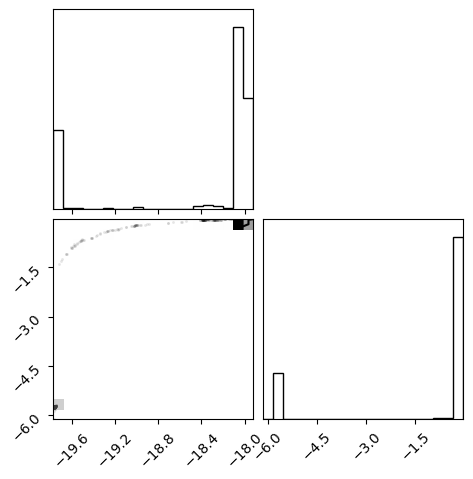

In [13]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)
fig = corner.corner(flat_samples)

In [14]:
flat_samples

array([[-19.65663134,  -1.1032073 ],
       [-19.69403036,  -1.22720418],
       [-19.75893231,  -5.82937429],
       ...,
       [-19.7544261 ,  -5.74439428],
       [-18.02838528,  -0.02883468],
       [-18.03046797,  -0.02832292]])

In [15]:
np.median(samples[:,0]), np.median(samples[:,1]) #wants way too small mass?

(-18.028362100020196, -0.02803527785287462)

(array([9.6480e+03, 6.3300e+02, 1.3600e+02, 4.0000e+01, 1.4000e+01,
        1.1000e+01, 2.4000e+01, 1.2000e+01, 2.9000e+01, 4.6000e+01,
        6.3000e+01, 2.7000e+01, 2.8000e+01, 4.5000e+01, 4.8000e+01,
        1.1000e+01, 3.0000e+00, 3.0000e+00, 2.9000e+01, 2.0000e+01,
        1.1000e+01, 1.4000e+01, 1.9000e+01, 2.6000e+01, 9.0000e+00,
        1.4000e+01, 4.1000e+01, 2.8000e+01, 2.5000e+01, 2.8000e+01,
        1.9000e+01, 2.7000e+01, 3.7000e+01, 5.0000e+00, 6.0000e+00,
        1.0000e+01, 1.3000e+01, 1.7000e+01, 7.0000e+00, 2.9000e+01,
        1.0800e+02, 7.3000e+01, 2.5000e+01, 2.2000e+01, 2.1000e+01,
        1.0000e+01, 7.0000e+00, 2.0000e+00, 1.7000e+01, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 1.0000e+00,
        4.0000e+00, 0.0000e+00, 1.3000e+01, 1.0000e+00, 8.0000e+00,
        0.0000e+00, 6.0000e+00, 0.0000e+00, 4.0000e+00, 2.1000e+01,
        1.0000e+00, 4.0000e+00, 0.0000e+00, 3.0000e+00, 7.0000e+00,
        8.0000e+00, 5.0000e+00, 3.0000e+00, 3.20

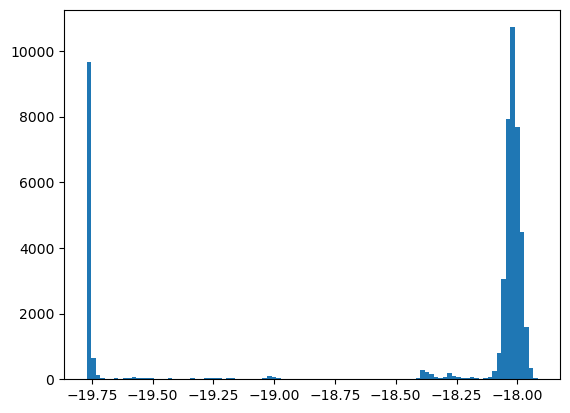

In [16]:
bins=100
plt.hist(samples[:,0], bins=bins)

(array([3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 7.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 5.000e+00, 1.000e+00, 6.000e+00, 3.000e+00, 1.000e+00,
        4.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 1.000e+00,
        6.000e+00, 3.000e+00, 3.000e+00, 3.000e+00, 0.000e+00, 1.000e+00,
        8.000e+00, 1.800e+01, 2.000e+00, 4.100e+01, 9.677e+03, 1.640e+02,
        1.000e+00, 8.000e+00, 2.000e+00, 5.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 4.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 7.000e+00, 1.000e+01, 1.200e+01,
        4.000e+00, 8.000e+00, 5.000e+00, 7.000e+00, 5.000e+00, 1.200e+01,
        2.600e+01, 2.300e+01, 6.300e+0

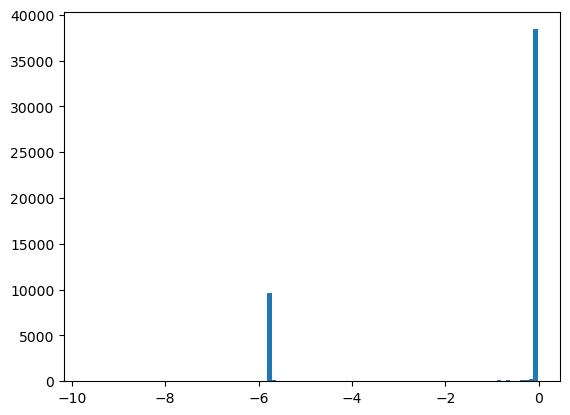

In [17]:
bins=100
plt.hist(samples[:,1], bins=bins)